In [2]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from states import make_state
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import curve_fit
from os import makedirs
import matplotlib.pyplot as plt
import measures as ms
import numpy as np
%matplotlib inline
der=r"/home/lhillber/documents/research/cellular_automata/qeca/qca/data/"

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [3]:
import qca
import core
import matrix
import measures
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
reload(measures)
from qca import QCA

In [4]:
def exp_fit(x, y):
    m, b = np.polyfit(x, np.log(y), 1)
    def func(x):
        return np.e**(b + m*x)
    return func, m, b

def powerlaw_fit(x, y):
    m, b = np.polyfit(np.log10(x), np.log10(y), 1)
    def func(x):
        return 10**b * x**m
    return func, m, b


def MIdist(M):
    L = len(M)
    return [sum(M[i,i+j] for i in range(L-j))/(L-j) for j in range(1,L)]
        

## Analog and Digital similarity

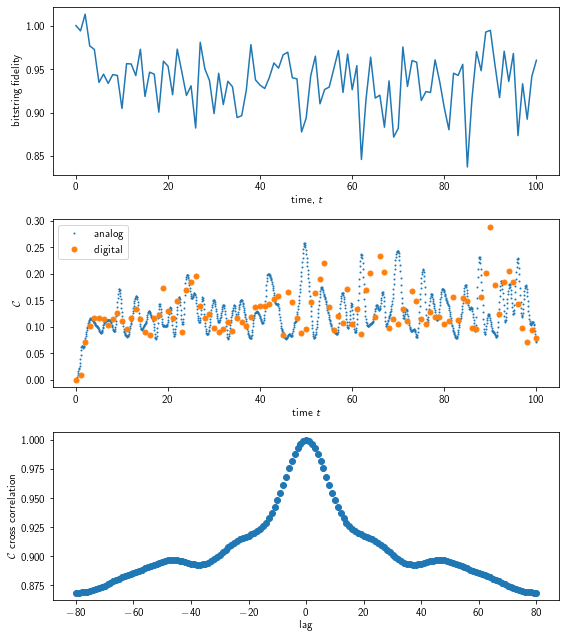

In [81]:
# Parameters template
params_template = dict(
              L=12,
              T=100.0,
              dt=0.1,
              R=6,
              r=1,
              V="X",
              BC="0",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              hamiltonian=True,
              trotter=True,
              symmetric=False)



paramsH = copy(params_template) 
paramsH["V"] = "X"
paramsH["hamiltonian"] = True
paramsH["dt"] = 0.1 * np.pi/4

paramsU = copy(params_template) 
paramsU["V"] = "H"
paramsU["hamiltonian"] = False
paramsU["dt"] = 1.0
paramsU["symmetric"] = False

QH = QCA(paramsH, der=der)
QU = QCA(paramsU, der=der)
    
QH.run(tasks=["rhoj", "rhojk", "bitstring"], verbose=False)
QU.run(tasks=["rhoj", "rhojk","bitstring"], verbose=False)

F = []
for t in QU.ts:
    i = int(t / paramsH["dt"])
    F.append(ms.get_bitstring_fidelity(QU.bitstring[int(t)], QH.bitstring[i]))


fig, axs = plt.subplots(3, 1, figsize=(8,9))
axs[1].plot(QH.ts, QH.C(1), label="analog", marker="o", ms=1, ls="none")
axs[1].plot(QU.ts, QU.C(1), label="digital", marker="o", ls="none", ms=5)
axs[1].set_xlabel(r"time $t$")
axs[1].set_ylabel(r"$\mathcal{C}$")
axs[1].legend()
axs[0].plot(QU.ts, F);
axs[0].set_ylabel(r"bitstring fidelity")
axs[0].set_xlabel(r"time, $t$")
axs[2].xcorr(QH.C(1), QH.C(1), maxlags=80, usevlines=False);
axs[2].set_ylabel(r"$\mathcal{C}$ cross correlation")
axs[2].set_xlabel("lag")
plt.tight_layout()
plt.show()

## Other Network measures

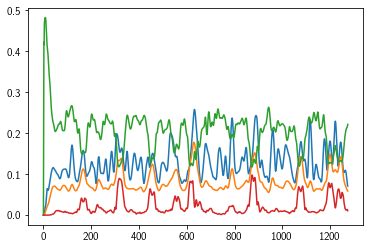

In [146]:
import qca
import core
import matrix
import measures
from importlib import reload
reload(qca)
reload(core)
reload(matrix)
reload(measures)
from qca import QCA
plt.plot(QH.C(1))
plt.plot(QH.D(1))
plt.plot(QH.Y(1))
plt.plot(QH.P(1))


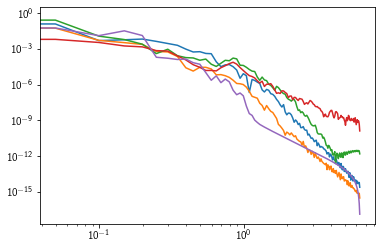

In [160]:
from matplotlib import mlab
def PSD(x, Fs=1):
    p, f = mlab.psd(x, Fs=Fs)
    return f, p
plt.loglog(*PSD(QH.C(1), Fs = 1/QH.dt))
plt.loglog(*PSD(QH.D(1), Fs = 1/QH.dt))
plt.loglog(*PSD(QH.Y(1), Fs = 1/QH.dt))
plt.loglog(*PSD(QH.P(1), Fs = 1/QH.dt))
plt.loglog(*PSD(np.mean(QH.exp("Z"), axis=1), Fs = 1/QH.dt))

## IC-averaged clustering (non-QT)

In [224]:
# Parameters template
L = 13
params_template = dict(
              L=L,
              T=100.0,
              dt=0.1,
              R=13,
              r=1,
              V="X",
              BC="1-00",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              hamiltonian=True,
              trotter=True,
              symmetric=True)

Ntrials = 10
exprob = 100*np.round(np.linspace(1/L, 1-1/L, 15), 2)
exprob = exprob.astype(int)
print(exprob)
ruleMIs = []
for R in [6, 13]:
    MIs = []
    for r in exprob:
        MI = 0
        for i in range(Ntrials):
            paramsU = copy(params_template) 
            paramsU["V"] = "D"
            paramsU["hamiltonian"] = False
            paramsU["dt"] = 1.0
            paramsU["R"] = R
            paramsU["IC"] = f"r{r}"

            QU = QCA(paramsU, der=der)
    
            QU.run(tasks=["rhoj", "rhojk"], verbose=True, recalc=True)
        
            MI += QU.MI(1) / Ntrials
        MIs += [MI]
    ruleMIs += [MIs]

[ 8 14 20 26 32 38 44 50 56 62 68 74 80 86 92]

Rank: 0
Updated: 50b50880e059fc81f846190c23a2e37a8ad792f2
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r8', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.42 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/50b50880e059fc81f846190c23a2e37a8ad792f2.hdf5


Rank: 0
Updated: 50b50880e059fc81f846190c23a2e37a8ad792f2
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r8', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamilto


Rank: 0
Updated: 0c27df74b48dedc86dac54f39c6d962fba629528
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r14', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.24 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/0c27df74b48dedc86dac54f39c6d962fba629528.hdf5


Rank: 0
Updated: 0c27df74b48dedc86dac54f39c6d962fba629528
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r14', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 2a80e425220496cdce628296a9e6a3ece81a4a04
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r20', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.30 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/2a80e425220496cdce628296a9e6a3ece81a4a04.hdf5


Rank: 0
Updated: 2a80e425220496cdce628296a9e6a3ece81a4a04
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r20', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: b99227d4283db22d353a035634c419752b550314
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r26', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.32 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/b99227d4283db22d353a035634c419752b550314.hdf5


Rank: 0
Updated: b99227d4283db22d353a035634c419752b550314
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r26', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: a052bbc78809206d49a84a540603646fe68a4ca1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r32', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.43 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/a052bbc78809206d49a84a540603646fe68a4ca1.hdf5


Rank: 0
Updated: a052bbc78809206d49a84a540603646fe68a4ca1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r32', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 6b69bb55061c57f2db4d848ad2e5ab40e5518d8a
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r38', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/6b69bb55061c57f2db4d848ad2e5ab40e5518d8a.hdf5


Rank: 0
Updated: 6b69bb55061c57f2db4d848ad2e5ab40e5518d8a
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r38', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: eeb43e75cc7512c2152f93e1923023f3c3d1f0ad
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r44', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.24 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/eeb43e75cc7512c2152f93e1923023f3c3d1f0ad.hdf5


Rank: 0
Updated: eeb43e75cc7512c2152f93e1923023f3c3d1f0ad
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r44', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 7dbafcdbdf04e40ff60de24cb0c37f0c6c4fc3ce
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r50', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.25 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/7dbafcdbdf04e40ff60de24cb0c37f0c6c4fc3ce.hdf5


Rank: 0
Updated: 7dbafcdbdf04e40ff60de24cb0c37f0c6c4fc3ce
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r50', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 83602e8f4f6844f827c510e4cfbf9bd073ac0ed1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r56', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.28 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/83602e8f4f6844f827c510e4cfbf9bd073ac0ed1.hdf5


Rank: 0
Updated: 83602e8f4f6844f827c510e4cfbf9bd073ac0ed1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r56', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 474692160e97074b39a81b300170c1e4c75eb167
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r62', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.29 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/474692160e97074b39a81b300170c1e4c75eb167.hdf5


Rank: 0
Updated: 75b290bc4e47bcd02efd65c445400ee116310df7
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r68', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: c721ad409b7359a622dbf4e68357988fef5bccd1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r74', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/c721ad409b7359a622dbf4e68357988fef5bccd1.hdf5


Rank: 0
Updated: c721ad409b7359a622dbf4e68357988fef5bccd1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r74', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 23f13e054f3e22d3786e99ab838eb936036afce0
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r80', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/23f13e054f3e22d3786e99ab838eb936036afce0.hdf5


Rank: 0
Updated: 23f13e054f3e22d3786e99ab838eb936036afce0
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r80', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 1bd609ad2aff940e8df59ada29fab5f5cf90afe1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r86', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/1bd609ad2aff940e8df59ada29fab5f5cf90afe1.hdf5


Rank: 0
Updated: 1bd609ad2aff940e8df59ada29fab5f5cf90afe1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r86', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 9a96ee8ab7ac834de99c9fd9bfb067199939baa4
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r92', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/9a96ee8ab7ac834de99c9fd9bfb067199939baa4.hdf5


Rank: 0
Updated: 9a96ee8ab7ac834de99c9fd9bfb067199939baa4
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'D', 'IC': 'r92', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 9bb8bcf310e4169c87844d9e4838fd2ca68f3d7a
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r8', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.30 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/9bb8bcf310e4169c87844d9e4838fd2ca68f3d7a.hdf5


Rank: 0
Updated: 9bb8bcf310e4169c87844d9e4838fd2ca68f3d7a
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r8', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rho


Rank: 0
Updated: 67f0c64f5ed2ffcdc68413dc92eb5a12555a4096
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r14', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.33 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/67f0c64f5ed2ffcdc68413dc92eb5a12555a4096.hdf5


Rank: 0
Updated: 67f0c64f5ed2ffcdc68413dc92eb5a12555a4096
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r14', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: d681e051e729ccc8e92d7355187f235bf299ac2f
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r20', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.28 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/d681e051e729ccc8e92d7355187f235bf299ac2f.hdf5


Rank: 0
Updated: d681e051e729ccc8e92d7355187f235bf299ac2f
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r20', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 014e246d8438fc52053008b6b22625f66ce8340b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r26', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/014e246d8438fc52053008b6b22625f66ce8340b.hdf5


Rank: 0
Updated: 014e246d8438fc52053008b6b22625f66ce8340b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r26', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 13b8294ef374537b65eb4e601bebcbcd62d560b4
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r32', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.26 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/13b8294ef374537b65eb4e601bebcbcd62d560b4.hdf5


Rank: 0
Updated: 13b8294ef374537b65eb4e601bebcbcd62d560b4
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r32', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 52c1acdcca67828efdcd4279aacdb3a70507dcc2
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r38', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.29 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/52c1acdcca67828efdcd4279aacdb3a70507dcc2.hdf5


Rank: 0
Updated: 6a19f596714a6e9e7d64dbaac9f32a13741f8320
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r44', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 25b314fff76f118a09b5f056b24c58c6372a71ed
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r50', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.30 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/25b314fff76f118a09b5f056b24c58c6372a71ed.hdf5


Rank: 0
Updated: 25b314fff76f118a09b5f056b24c58c6372a71ed
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r50', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: e76e5a2e7a44682e154ab56f7ba68f95d1d96c7b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r56', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.53 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/e76e5a2e7a44682e154ab56f7ba68f95d1d96c7b.hdf5


Rank: 0
Updated: e76e5a2e7a44682e154ab56f7ba68f95d1d96c7b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r56', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 0feb7ef63878c1186a638c5235346ccace85ee55
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r62', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.25 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/0feb7ef63878c1186a638c5235346ccace85ee55.hdf5


Rank: 0
Updated: 0feb7ef63878c1186a638c5235346ccace85ee55
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r62', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: d4a07122eac55524080352c1dd8464fa81c3ea83
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r68', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.27 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/d4a07122eac55524080352c1dd8464fa81c3ea83.hdf5


Rank: 0
Updated: d4a07122eac55524080352c1dd8464fa81c3ea83
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r68', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: c707e39b5509e5731f153d814d7960df1013410b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r74', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.69 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/c707e39b5509e5731f153d814d7960df1013410b.hdf5


Rank: 0
Updated: c707e39b5509e5731f153d814d7960df1013410b
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r74', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: e4be7a0a8b52c56aa8b0cb494f27020c2fc83cc5
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r80', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.27 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/e4be7a0a8b52c56aa8b0cb494f27020c2fc83cc5.hdf5


Rank: 0
Updated: e4be7a0a8b52c56aa8b0cb494f27020c2fc83cc5
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r80', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 58d7a865a323f7b970bea4dbaff2825e3139d66c
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r86', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.27 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/58d7a865a323f7b970bea4dbaff2825e3139d66c.hdf5


Rank: 0
Updated: 58d7a865a323f7b970bea4dbaff2825e3139d66c
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r86', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r


Rank: 0
Updated: 38c59f58caad80a75940d05df811f33c03c47ce1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r92', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 13, 'rank': 0, 'nprocs': 1}
total file size: 2.10 MB
took: 2.36 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/38c59f58caad80a75940d05df811f33c03c47ce1.hdf5


Rank: 0
Updated: 38c59f58caad80a75940d05df811f33c03c47ce1
with ['rhoj', 'rhojk']
Parameters: {'L': 13, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 13, 'r': 1, 'V': 'D', 'IC': 'r92', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': True, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['r

In [228]:
ruleMIs = np.array(ruleMIs)

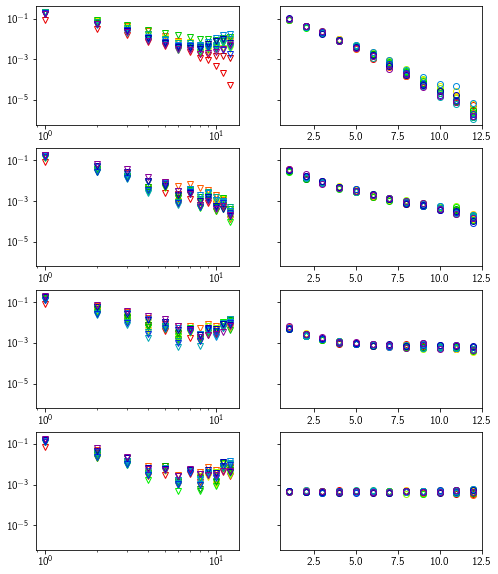

In [448]:
T0s = [5, 10, 20, -1]


cmap = cm.get_cmap("nipy_spectral_r")
cs = [cmap((j+1) * (0.9)/(len(exprob))) for j in range(len(exprob))]
fig, axs = plt.subplots(len(T0s), 2, figsize=(8,10), sharey=True)
corrlens6 = []
corrlens13 = []
for Ti, T0 in enumerate(T0s):
    MIs6, MIs13 = ruleMIs[:, :, T0, :, :]
    lines6 = np.array(list(map(MIdist, MIs6)))
    lines13 = np.array(list(map(MIdist, MIs13)))
    for line6, line13, c in zip(lines6, lines13, cs):
        func, m, b = powerlaw_fit(sites, line6)
        corrlens6.append(m)
        axs[Ti, 0].plot(ds, line6, marker="v", mfc="none", mec=c, ls="none")
        #axs[Ti, 0].plot(ds, func(ds), c="k")
    
        func, m, b = exp_fit(ds, line13)
        corrlens13.append(m)
        axs[Ti, 1].plot(ds, line13, marker="o", mfc="none", mec=c, ls="none")
        #axs[Ti, 1].plot(ds, func(ds), c="k");
    axs[Ti, 0].set_yscale("log")
    axs[Ti, 0].set_xscale("log")
    axs[Ti, 1].set_yscale("log")
    #axs[Ti, 1].set_xscale("log")

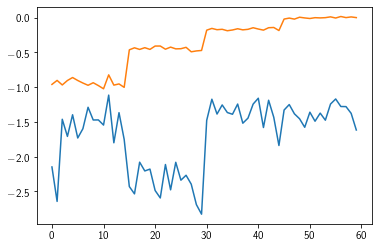

In [445]:
plt.plot(corrlens6)
plt.plot(corrlens13)

In [8]:
L=13
exprob = 100*np.round(np.linspace(1/L, 1-1/L, 50), 2)
exprob = exprob.astype(int)
exprob = np.arange(7,100,2)
print(exprob)

[ 7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53
 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99]


## IC-averaged clustering (QT)

In [16]:
# Parameters template
L = 13
Rs = np.array([1, 6, 13, 14])
#exprob = 100*np.round(np.linspace(1/L, 1-1/L, 20), 2)
#exprob = exprob.astype(int)

exprob = np.arange(7,100,2)

ICs = np.array([f"r{r}" for r in exprob])
BCs = ["1-00", "0"]

Qs = np.zeros((len(Rs), len(exprob), len(BCs)), dtype="object")

params_template = dict(
              L=L,
              T=100.0,
              dt=1.0,
              r=1,
              V="H",
              BC="0",
              E=0.0,
              N=500,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

for i, R in enumerate(Rs):
    for j, IC in enumerate(ICs):
        for k, BC in enumerate(BCs):
            params = copy(params_template) 
            params["R"] = R
            params["IC"] = IC
            params["BC"] = BC

            Q = QCA(params, der=der)
            #Q.run(tasks=["rhoj", "rhojk"], verbose=True, recalc=False)
            Q.MI(1)
            Qs[i, j, k] = Q

### Mutual information correlation length

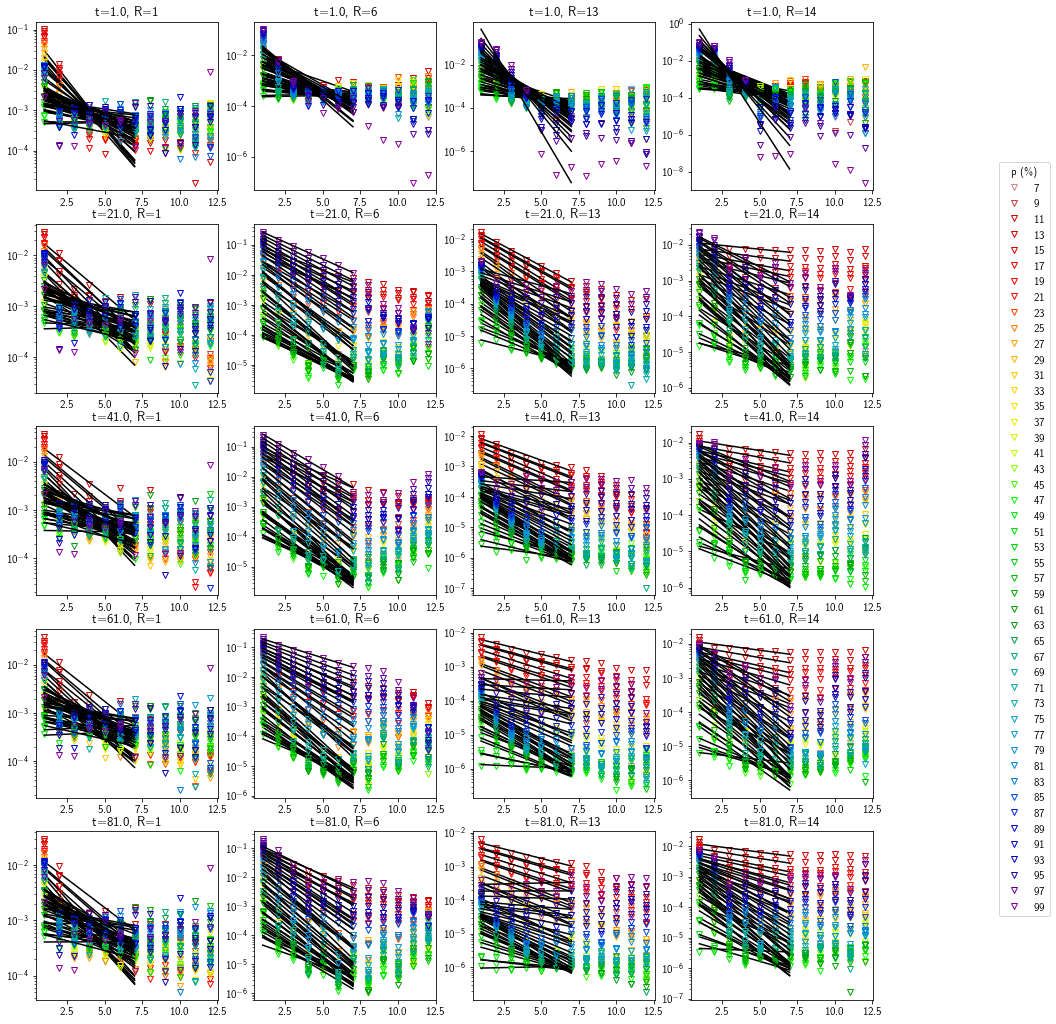

In [20]:
T0s = Q.ts[1:-1:20]
ds = np.arange(1, L)
dmin=0
dmax=7

cmap = cm.get_cmap("nipy_spectral_r")
cs = [cmap((j+1) * (0.9)/(len(ICs))) for j in range(len(ICs))]

fig, axs = plt.subplots(len(T0s), len(Rs), figsize=(15,18), sharey=False)
if len(Rs)==1 and len(T0s)==1:
    axs = np.array([axs])[np.newaxis,:]
elif len(Rs)==1:
    axs = axs[:, np.newaxis]
elif len(T0s)==1:
    axs = axs[np.newaxis,:]

corrlens = np.zeros((len(Q.ts), len(Rs), len(ICs)))

for Ri, R in enumerate(Rs):
    for ICi, (IC, color) in enumerate(zip(ICs, cs)):
        Q = Qs[Ri, ICi, 0]
        MIs = Q.MI(order = 1)
        Mbar = np.array(list(map(MIdist, MIs)))
        for ti, t0 in enumerate(Q.ts):
            line = Mbar[list(Q.ts).index(t0)]
            func, m, b = exp_fit(ds[dmin:dmax], line[dmin:dmax])
            corrlens[ti, Ri, ICi] = -1.0 / m
            if t0 in T0s:
                Ti = list(T0s).index(t0)
                axs[Ti, Ri].plot(ds, line, marker="v", mfc="none", mec=color, ls="none", label=f"{IC[1:]}%")
                axs[Ti, Ri].plot(ds[dmin:dmax], func(ds)[dmin:dmax], c="k")
                axs[Ti, Ri].set_title(f"t={t0}, R={R}")
                axs[Ti, Ri].set_yscale("log")
                #axs[Ti, Ri].set_xscale("log")
axs[-1, -1].legend(title=r"p (\%)", bbox_to_anchor=(2, 5))


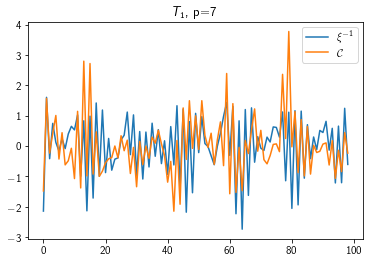

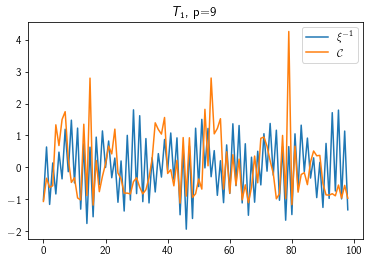

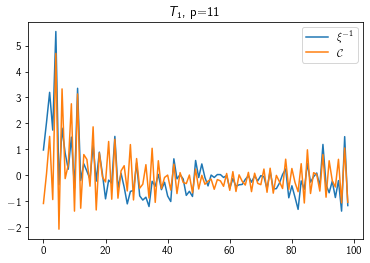

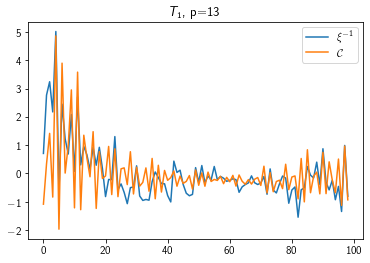

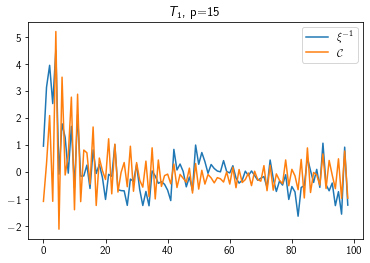

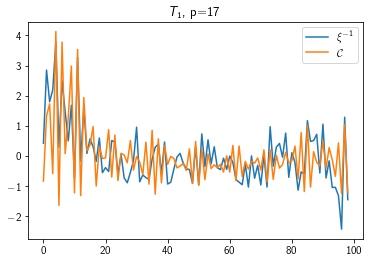

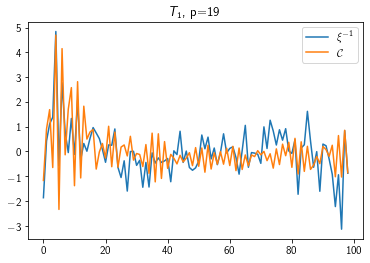

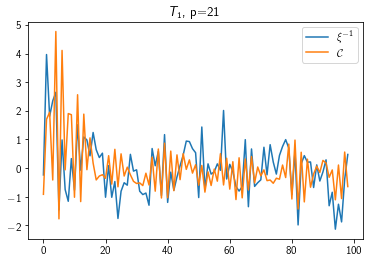

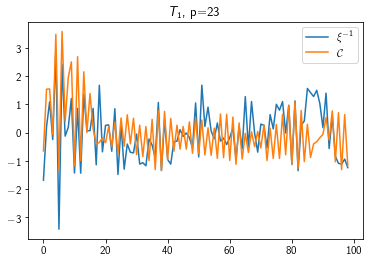

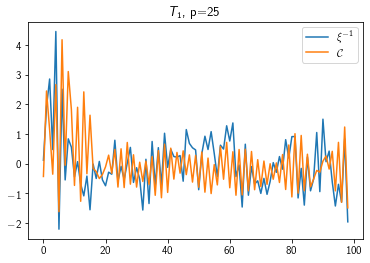

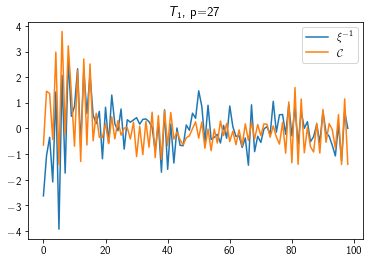

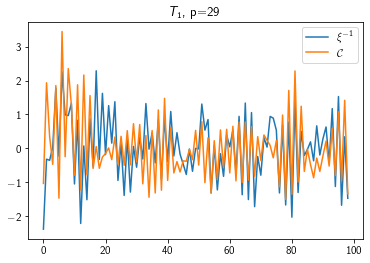

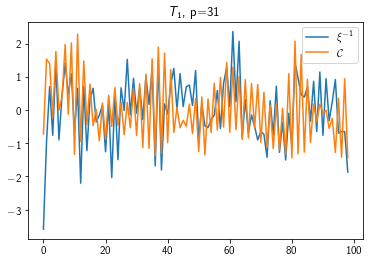

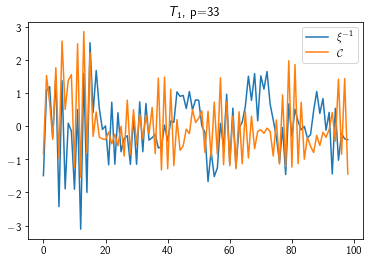

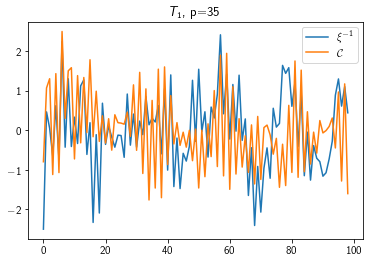

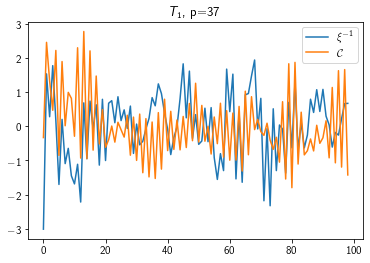

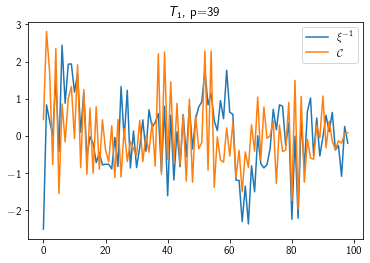

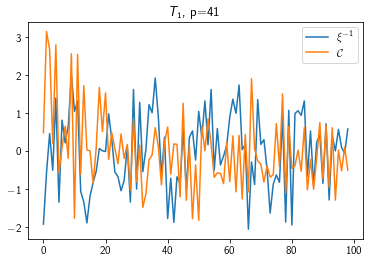

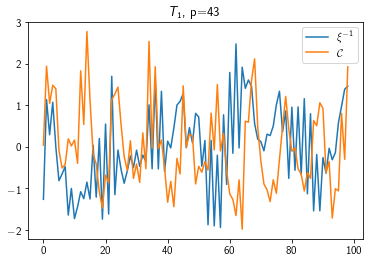

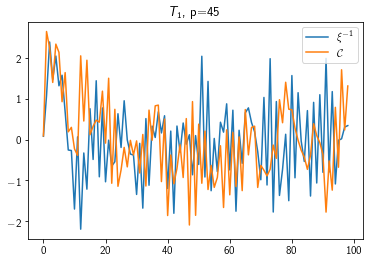

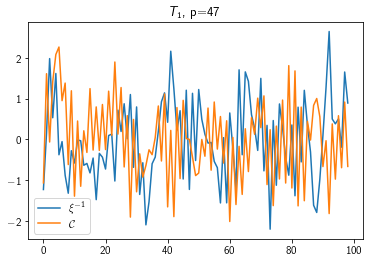

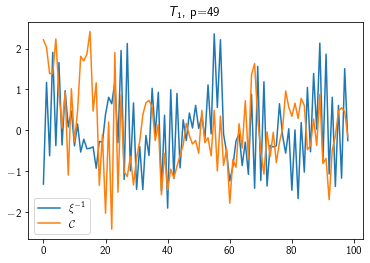

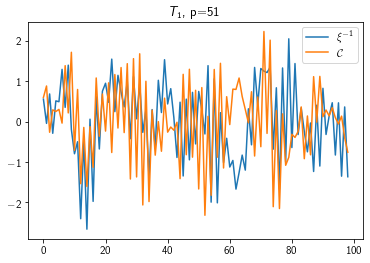

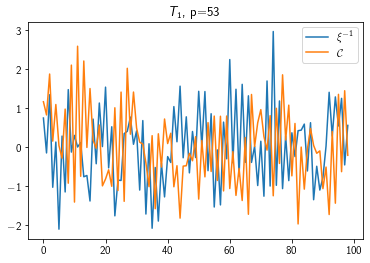

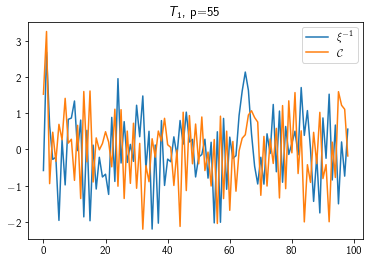

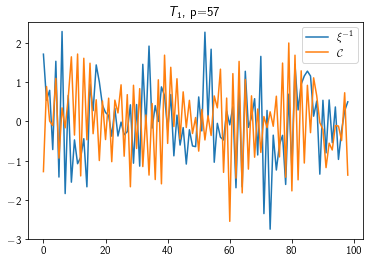

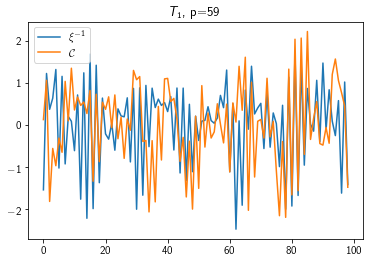

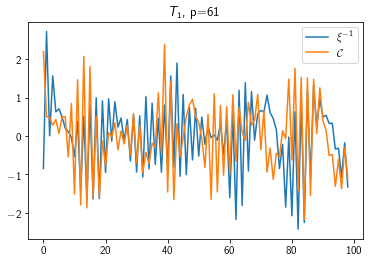

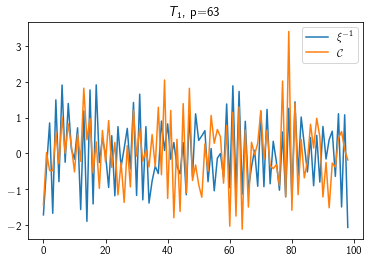

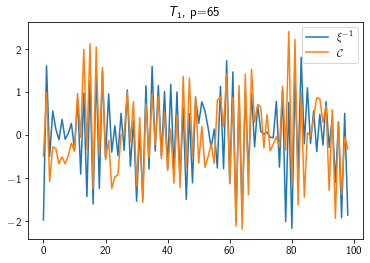

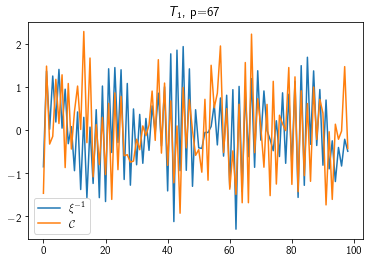

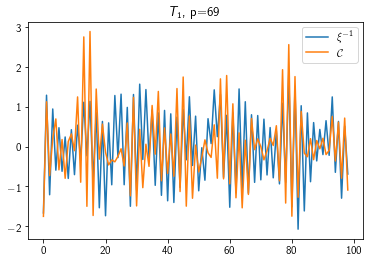

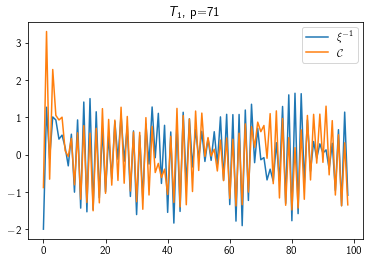

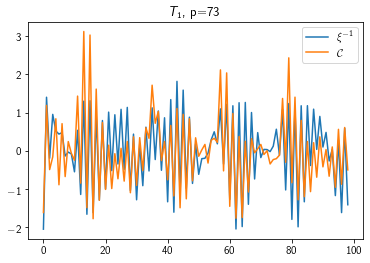

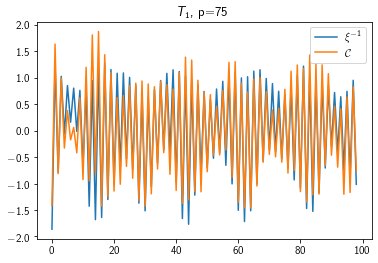

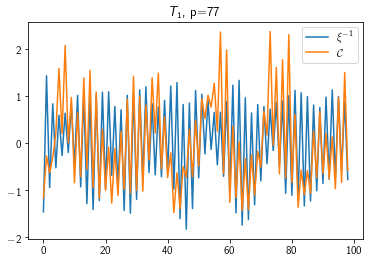

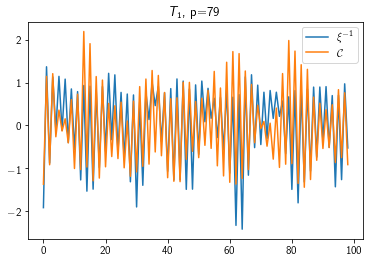

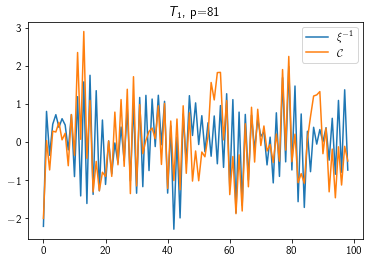

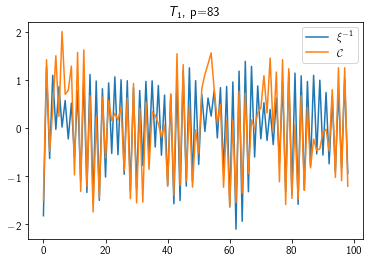

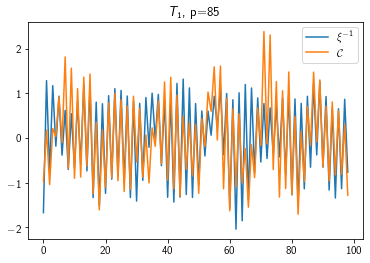

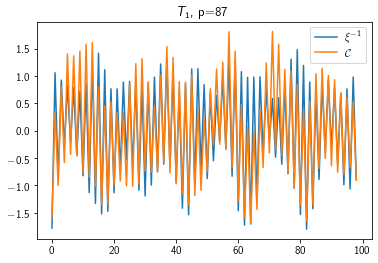

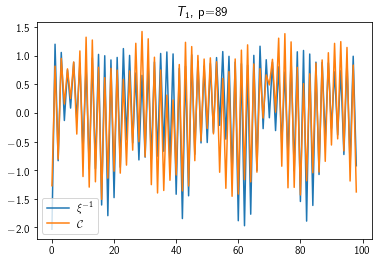

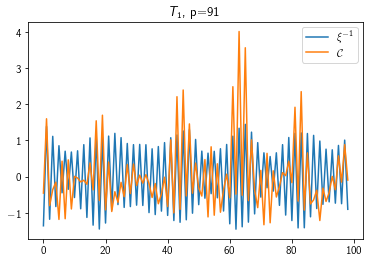

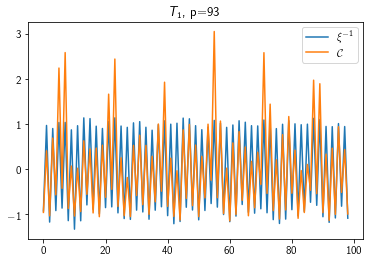

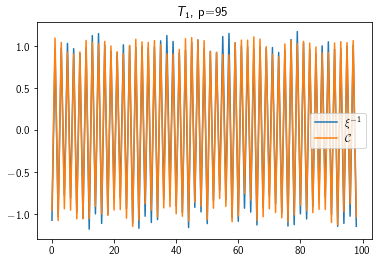

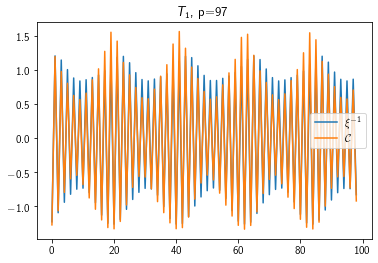

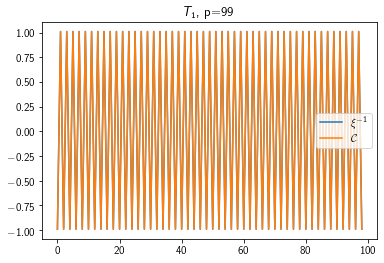

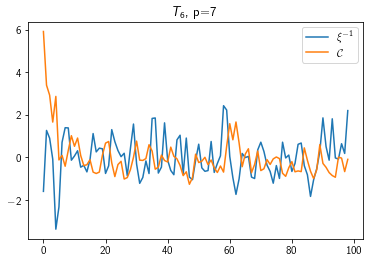

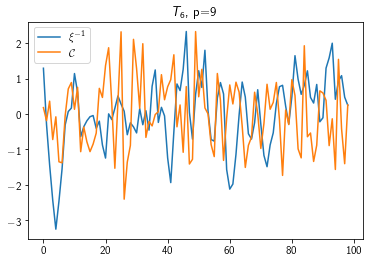

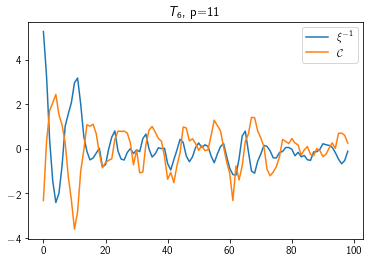

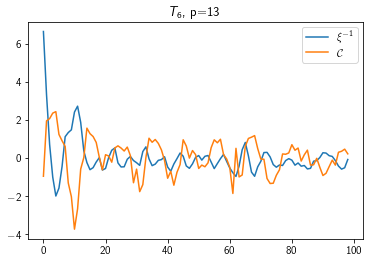

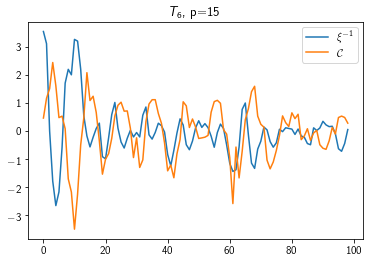

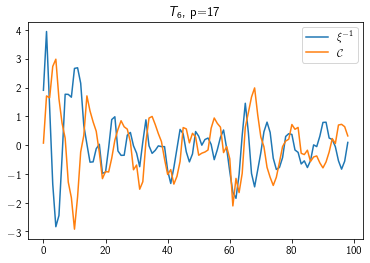

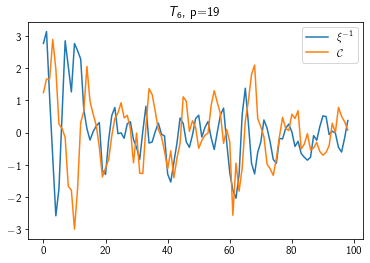

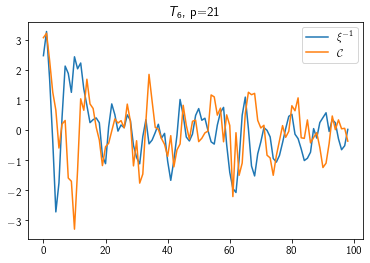

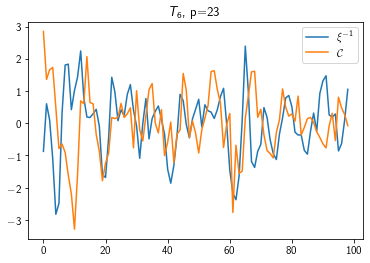

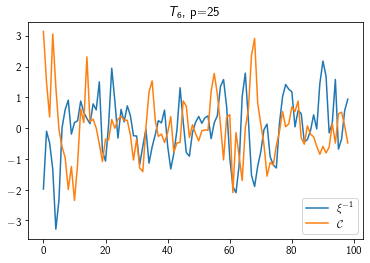

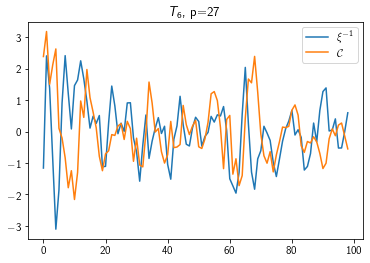

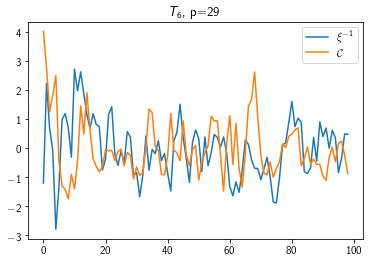

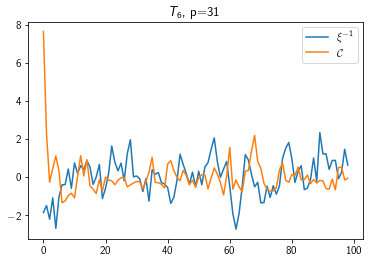

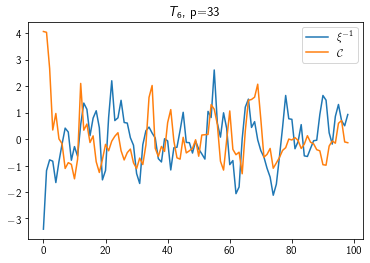

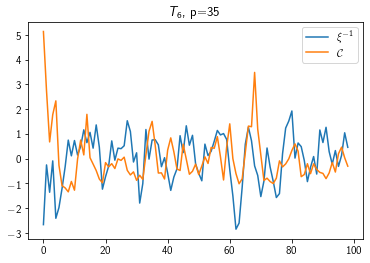

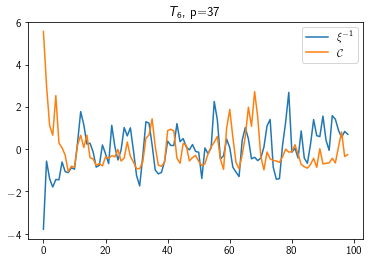

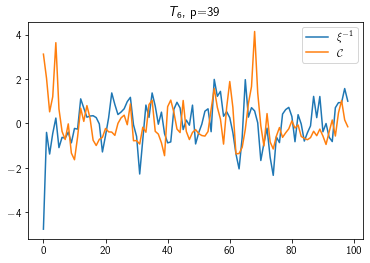

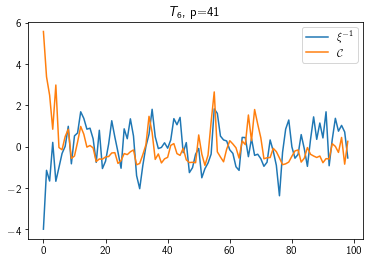

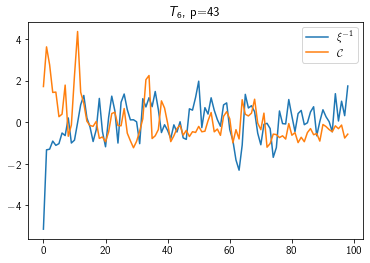

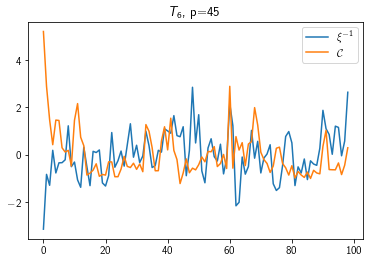

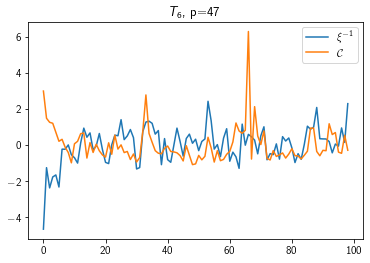

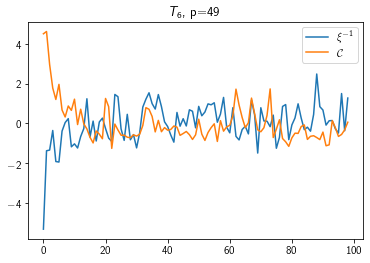

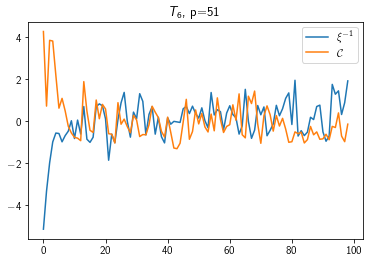

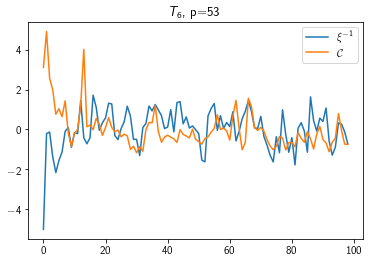

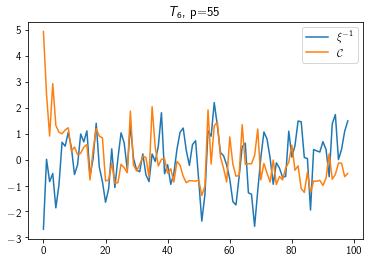

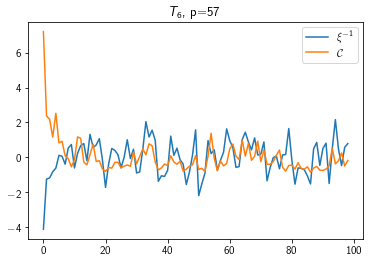

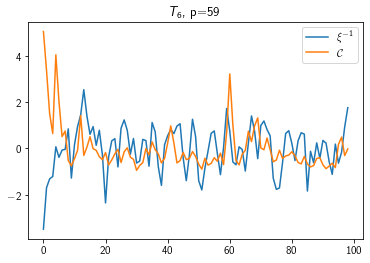

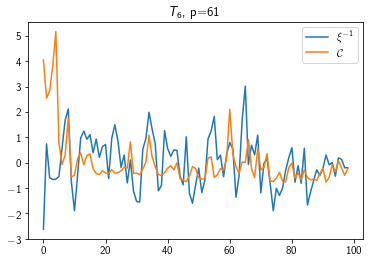

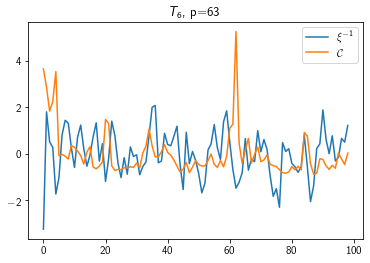

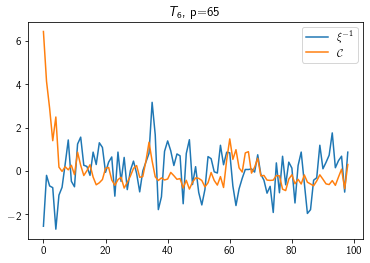

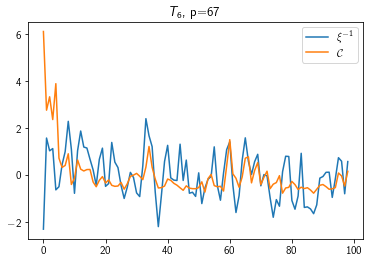

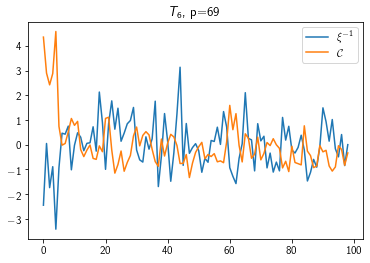

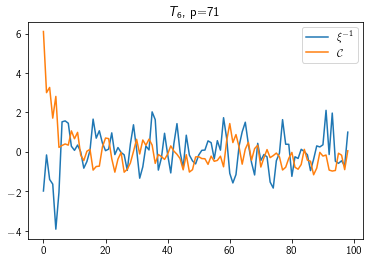

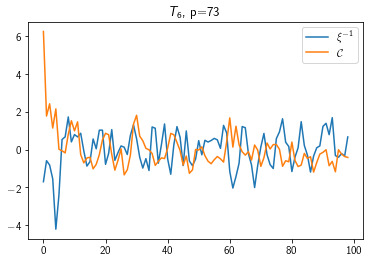

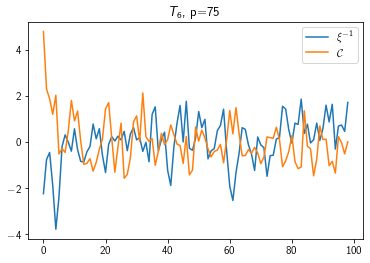

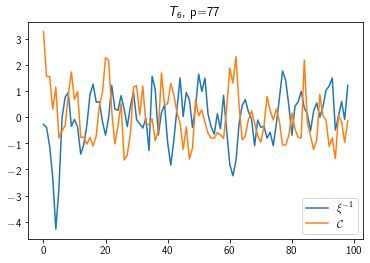

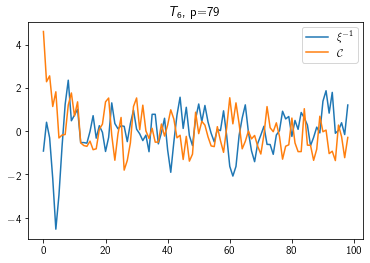

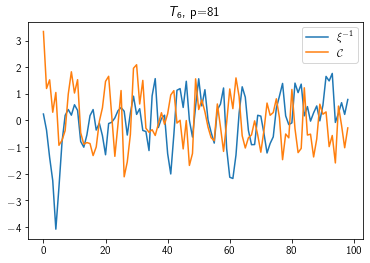

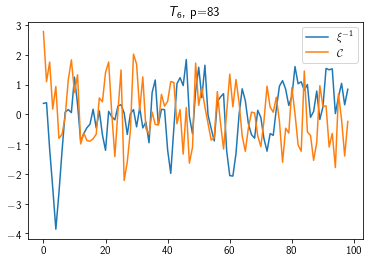

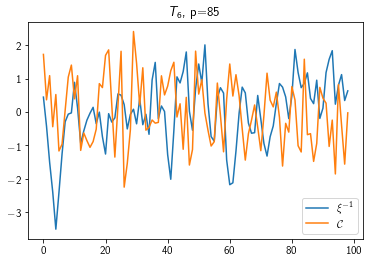

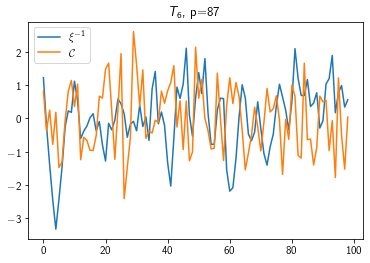

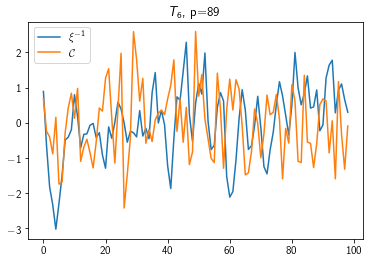

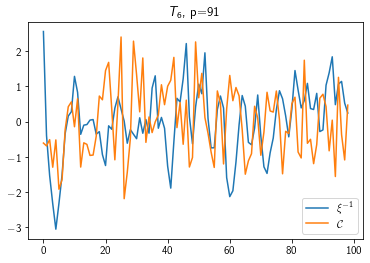

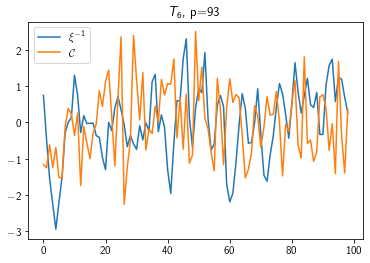

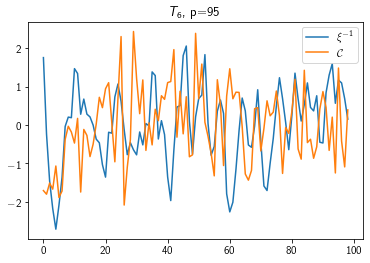

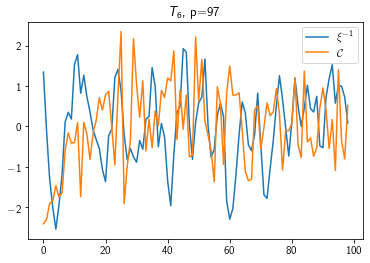

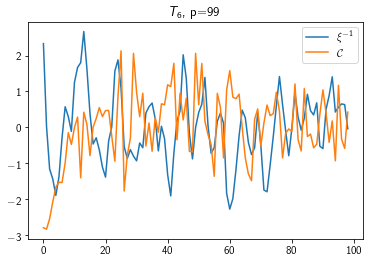

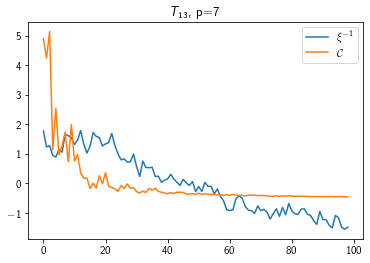

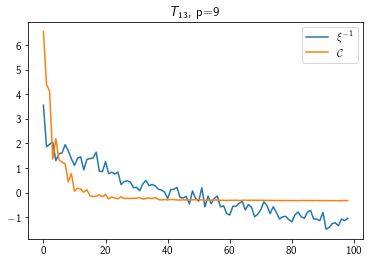

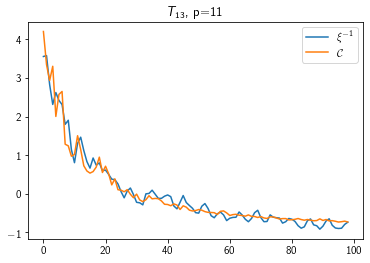

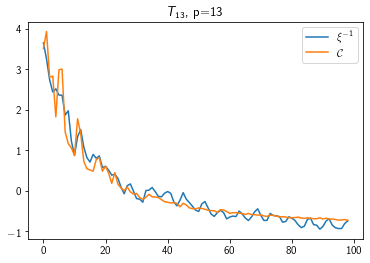

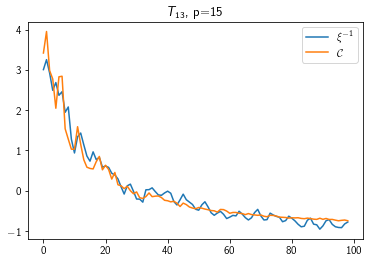

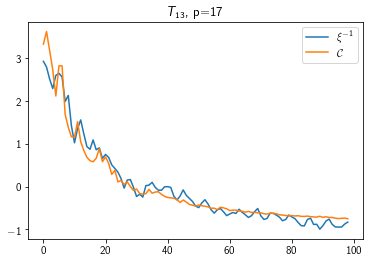

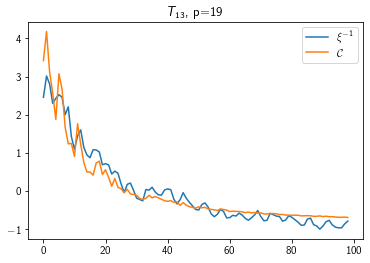

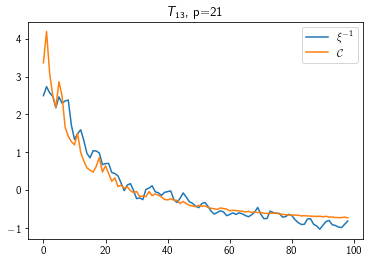

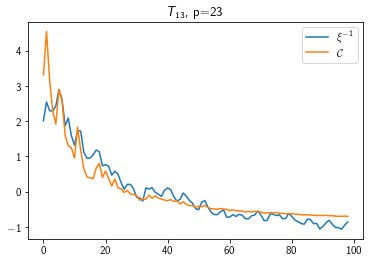

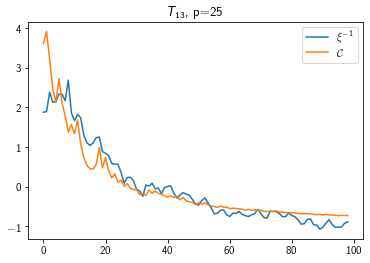

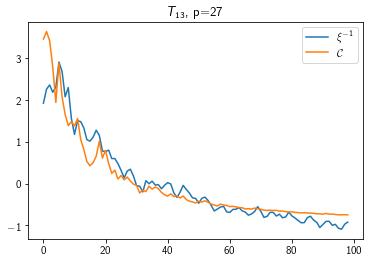

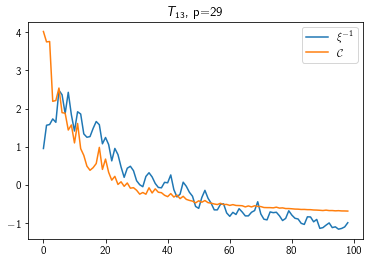

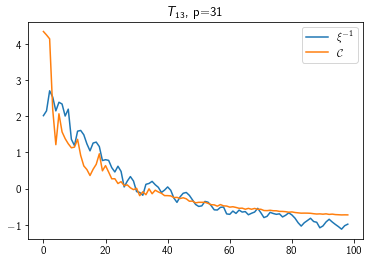

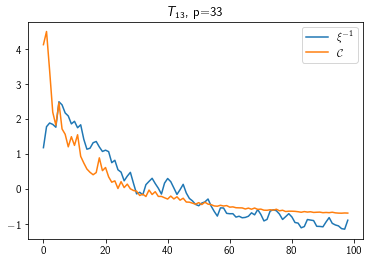

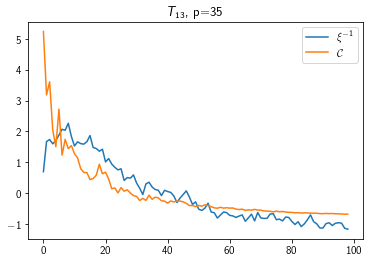

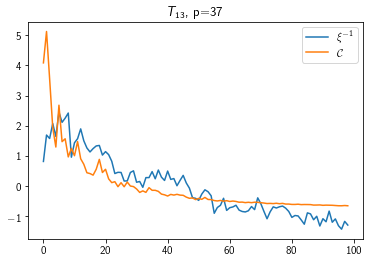

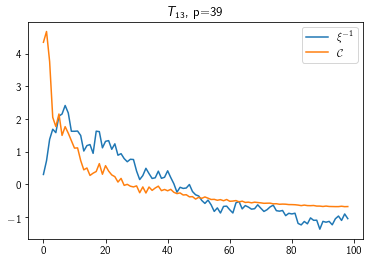

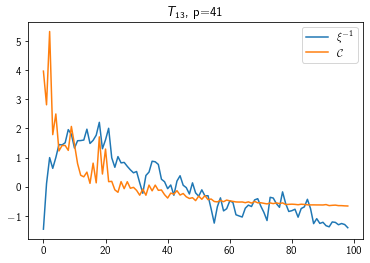

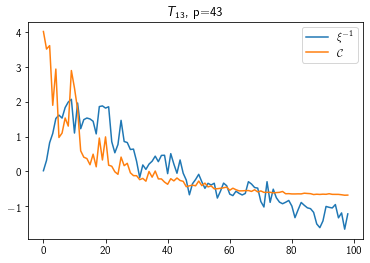

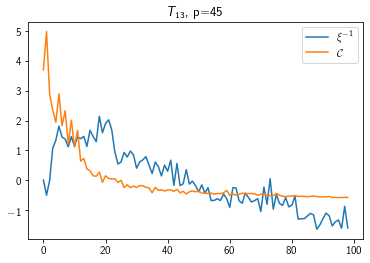

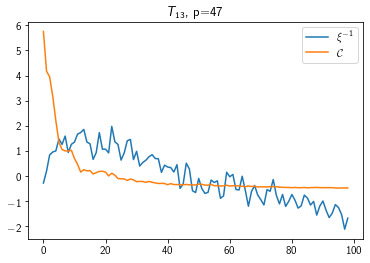

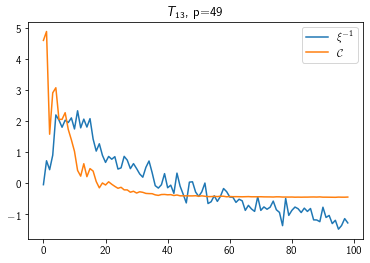

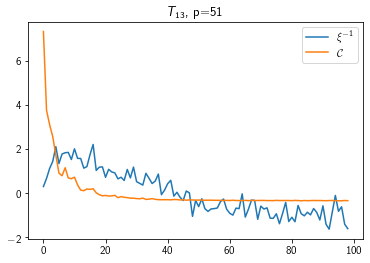

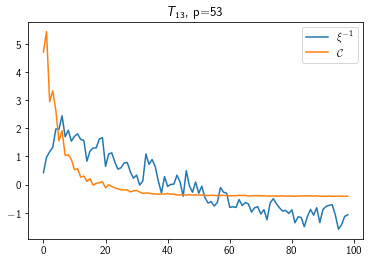

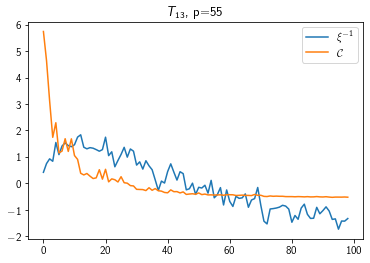

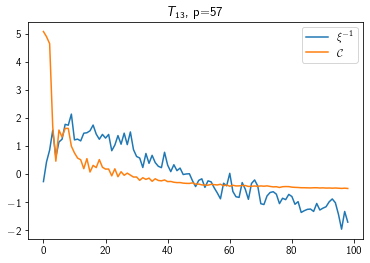

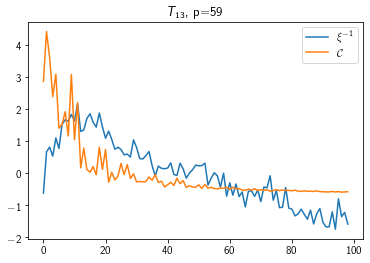

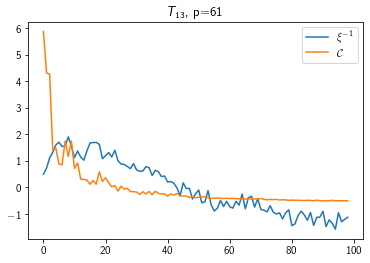

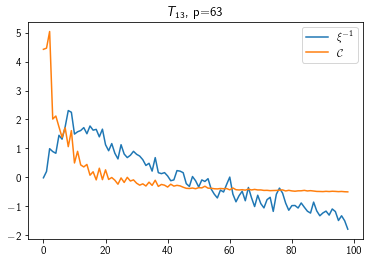

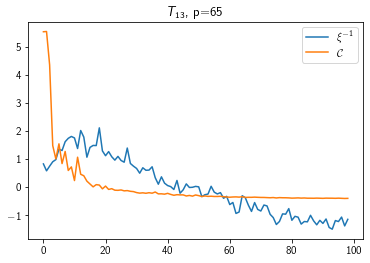

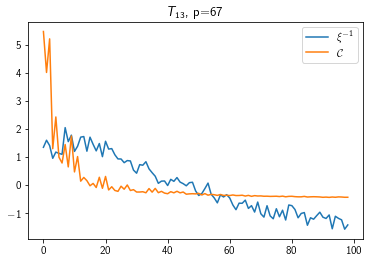

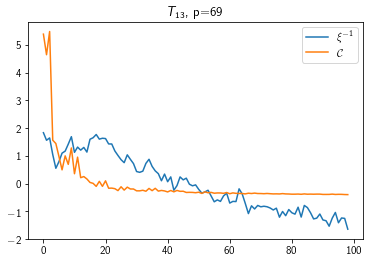

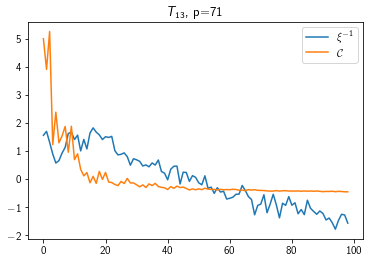

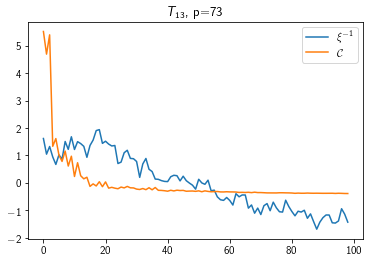

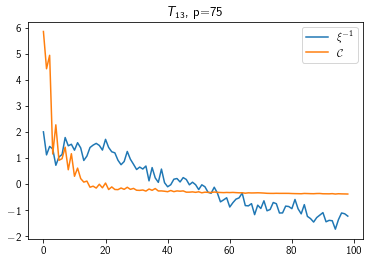

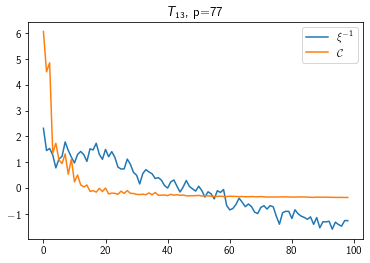

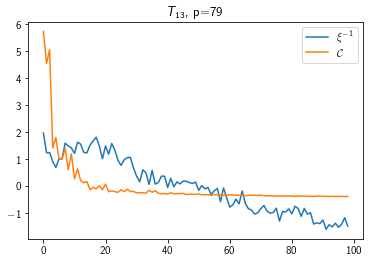

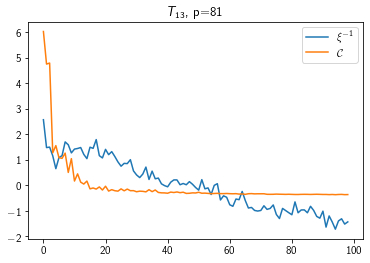

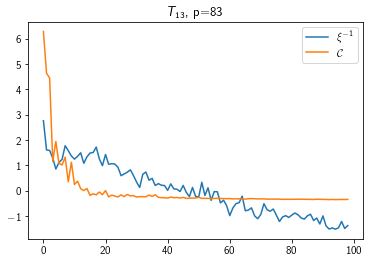

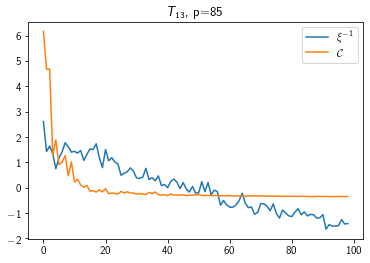

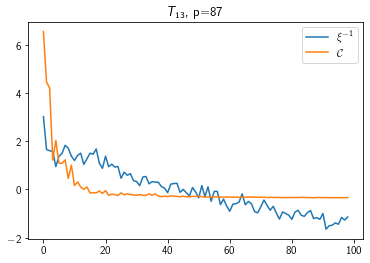

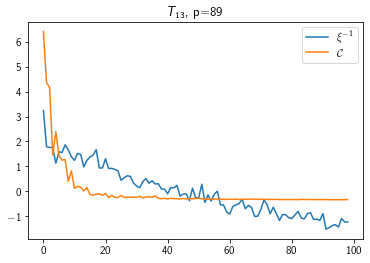

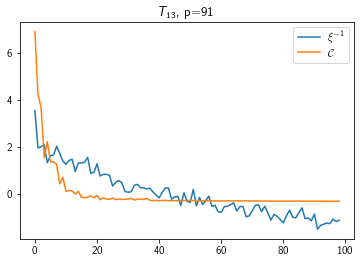

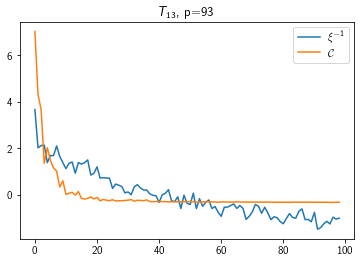

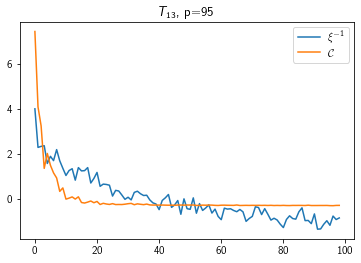

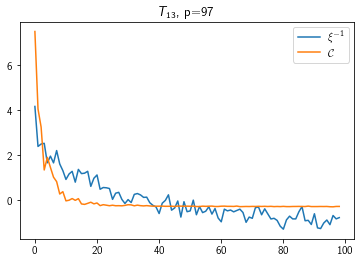

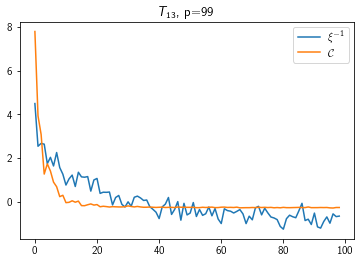

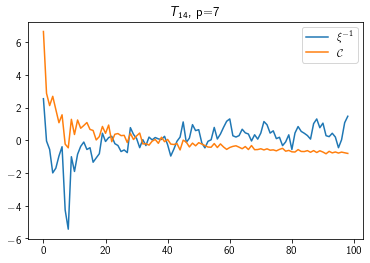

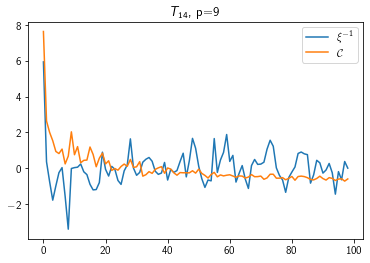

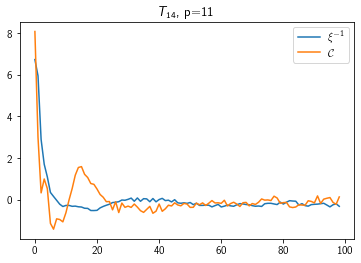

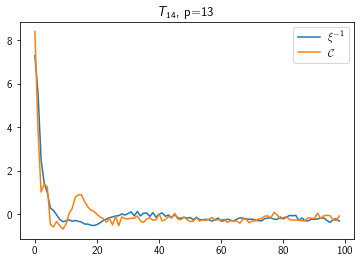

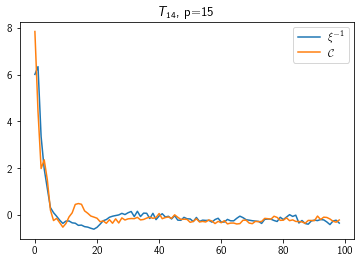

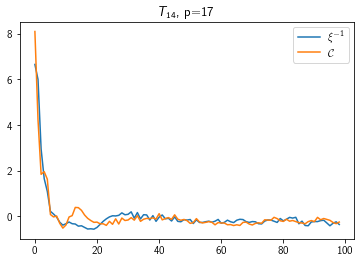

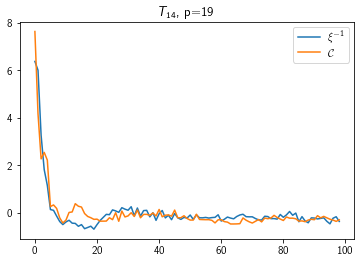

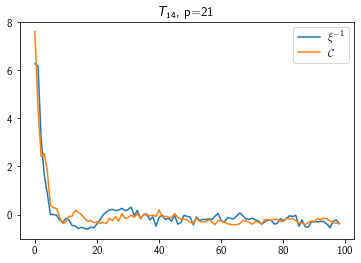

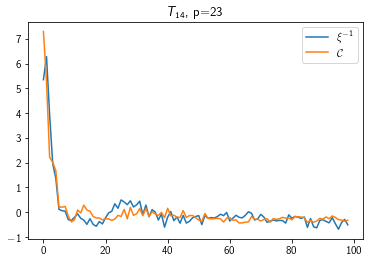

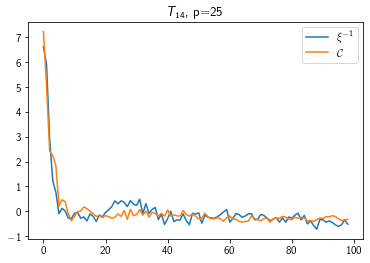

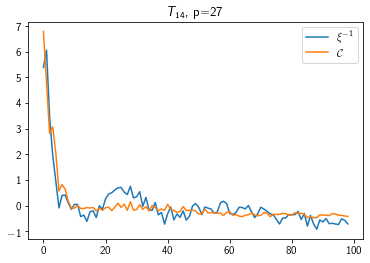

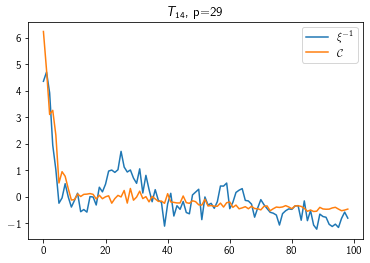

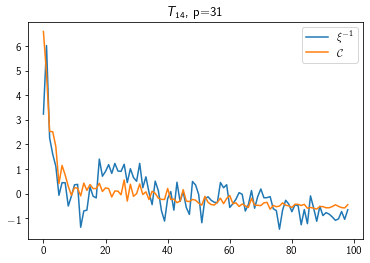

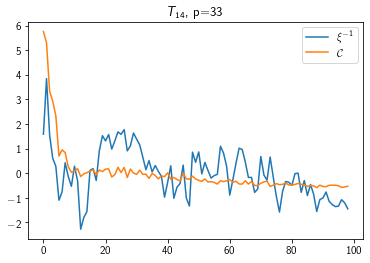

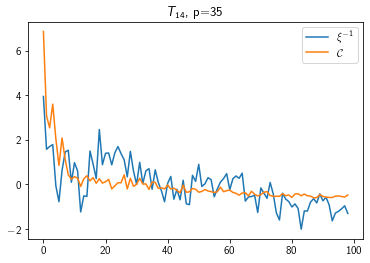

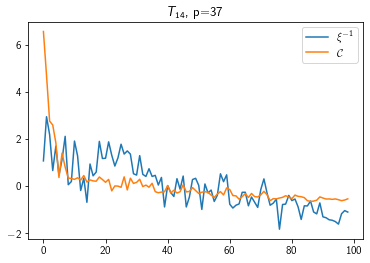

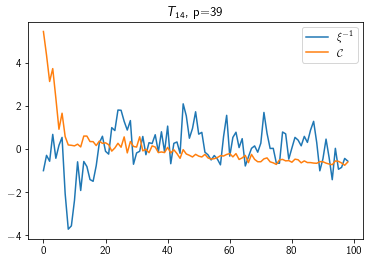

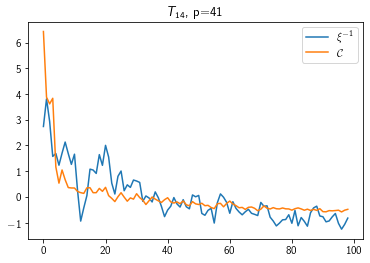

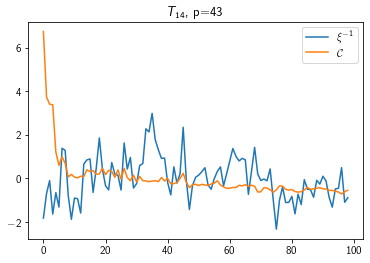

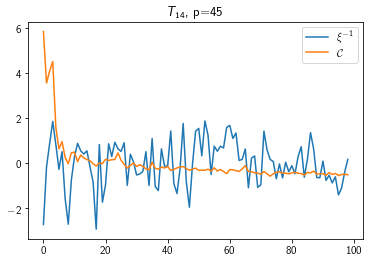

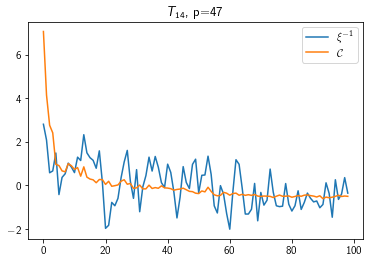

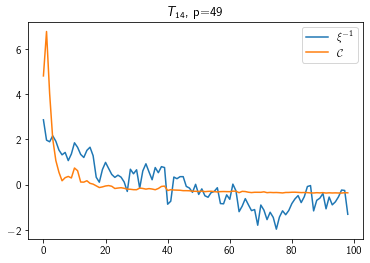

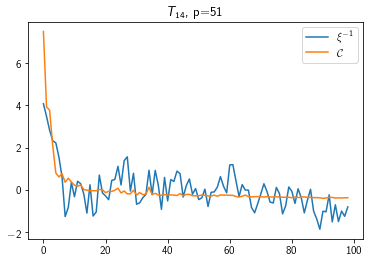

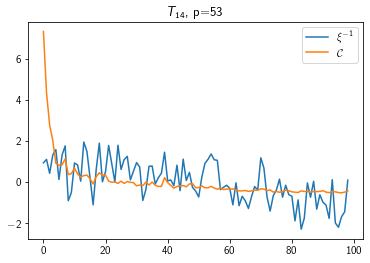

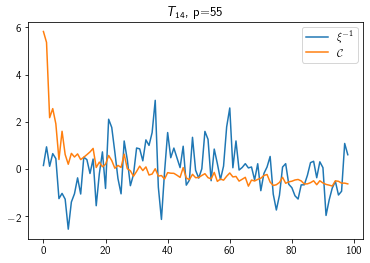

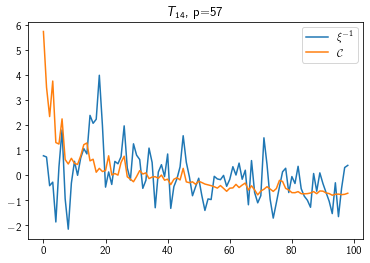

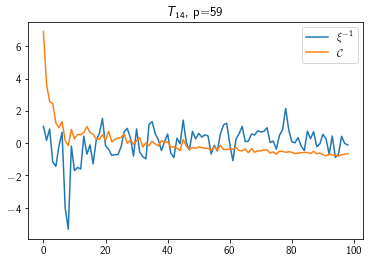

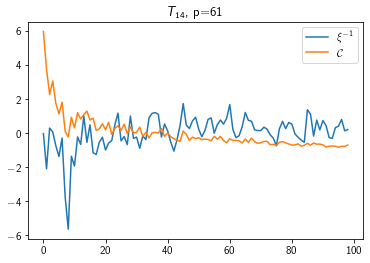

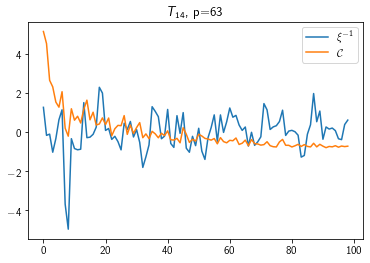

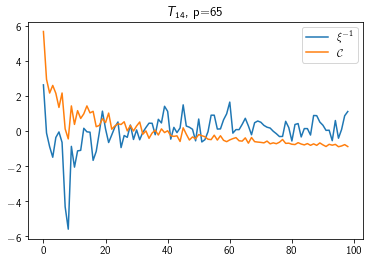

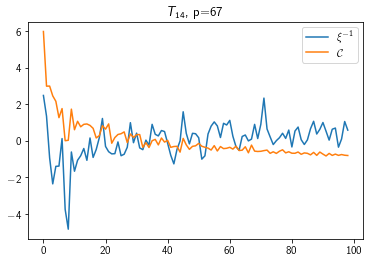

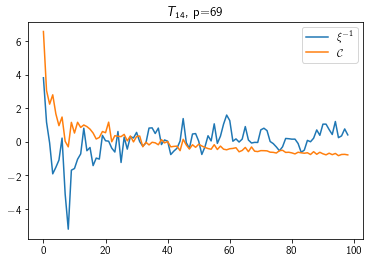

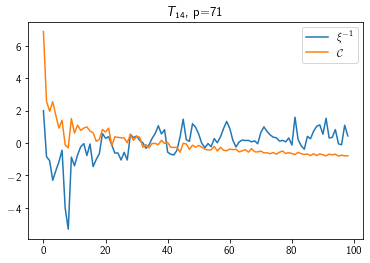

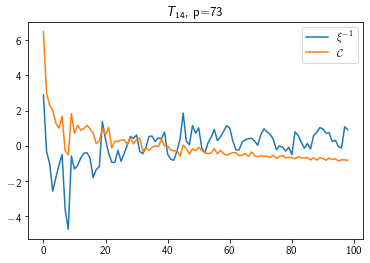

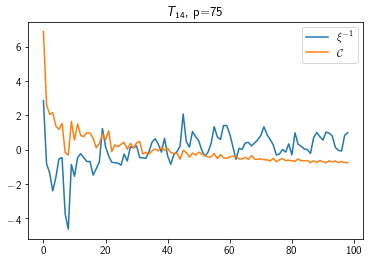

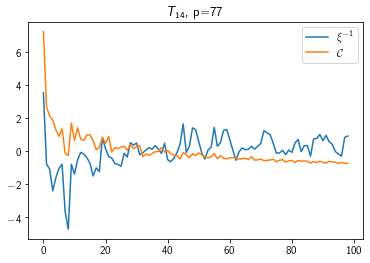

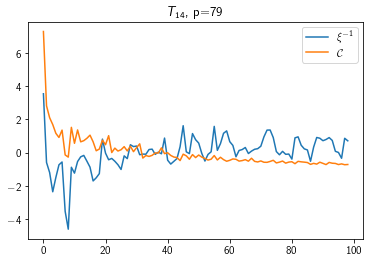

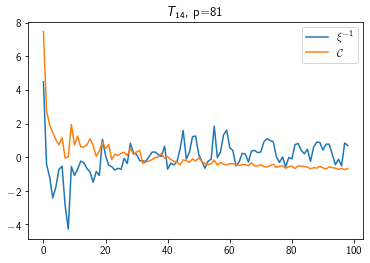

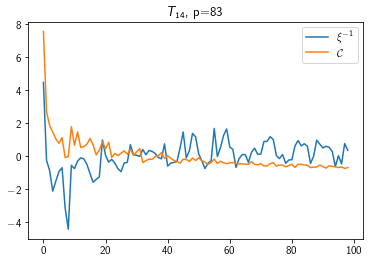

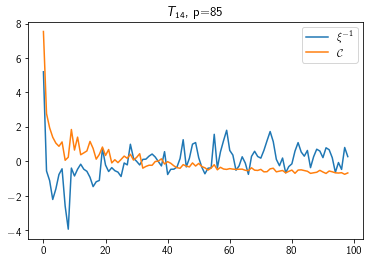

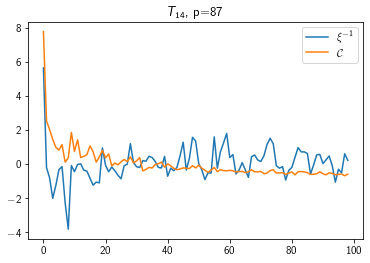

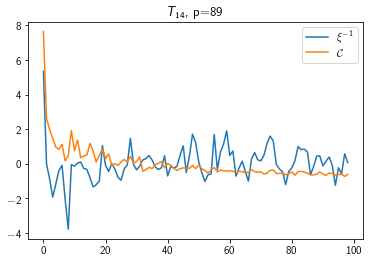

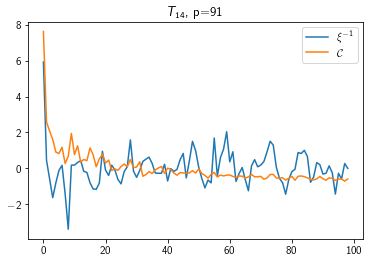

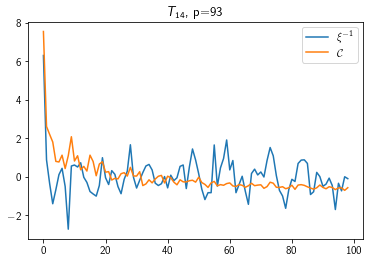

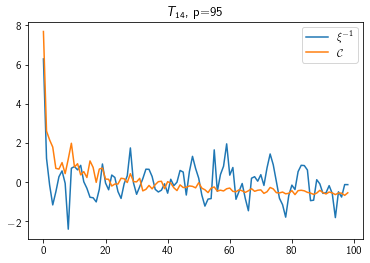

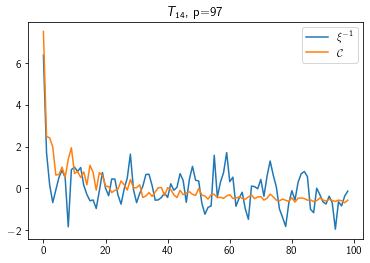

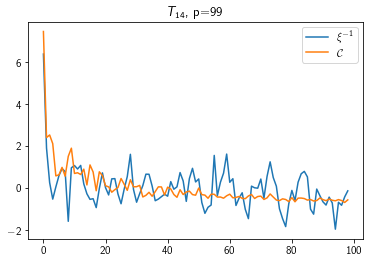

In [27]:
for Ri, R in enumerate(Rs):
    for ICi, (IC, color) in enumerate(zip(ICs, cs)):
        cl = 1/corrlens[:, Ri, ICi][2:]
        CC = Qs[Ri, ICi, 0].C(1)[2:]
        cl -= np.mean(cl)
        CC -= np.mean(CC)
        cl /= np.std(cl)
        CC /= np.std(CC)
        plt.plot(cl, label=r"$\xi^{-1}$")
        plt.plot(CC, label=r"$\mathcal{C}$")
        plt.title("$T_{%s}$"%R  + f", p={IC[1:]}")
        plt.legend()
        plt.show()

### Z-expectation and clustering vs excitation density

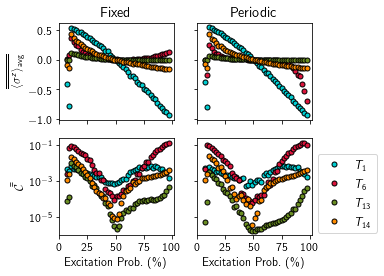

In [131]:
from copy import copy
from figures import colors
from measures import network_clustering, get_MI_from_state
randline = network_clustering(get_MI_from_state(make_state(13, "R"), order=1))
randline = network_clustering(get_MI_from_state(make_state(13, "R"), order=1))
measures = [r"exp_Z", r"C_1"]
names = {"exp_Z":r"$\overline{\overline{\langle \sigma^{z} \rangle_{\mathrm{avg}}}}$",
         "exp_X":r"$\bar{\bar{\langle \sigma^{x} \rangle_{\mathrm{avg}}}}$",
         "C_1": r"$\bar{\bar{\mathcal{C}}}$",
         "Dexp_Z":r"$\Delta \bar{\langle \sigma^{z} \rangle_{\mathrm{avg}}}$",
         "Dexp_X":r"$\Delta \bar{\langle \sigma^{x} \rangle_{\mathrm{avg}}}$",
         "DC_1": r"$\Delta \bar{\mathcal{C}}$",
        }
fig, axs = plt.subplots(len(measures), len(BCs), figsize=(5.5,4), sharex=True, sharey="row")

for R in [1,6,13,14]:
    Ri = list(Rs).index(R)
    xy = np.zeros((len(measures), Q.ts.size, len(exprob)))
    for measi, meas in enumerate(measures):
        for BCi, BC in enumerate(BCs):
            for ICi, IC in enumerate(ICs):
                Q = Qs[Ri, ICi, BCi]
                m = Q.get_measure(meas)
                if len(m.shape) == 2:
                    m = np.mean(m, axis=1)
                    log = False
                else:
                    log=True
                xy[measi, :, ICi] = m
    
            axs[measi, BCi].plot(exprob[:-1], np.mean(xy[measi, 50:, :-1], axis=0),
                            color=colors[R], 
                            mec="k", 
                            ls="none", 
                            #mfc="none",
                            marker="o",
                            ms=5,
                            label=r"$T_{%s}$"%R)
            #axs[1, measi].plot(exprob[:-1], np.std(xy[measi, 50:, :-1], axis=0),
            #                   color=colors[R], mec=colors[R], ls="none", mfc="none", marker="o", label=r"$T_{%s}$"%R)
   
            #axs[0, measi].plot(exprob[2:], xy[measi, 6, 2:],
            #                   color=colors[R], mec=colors[R], ls="none", mfc="none", marker="o", label=r"$T_{%s}$"%R)
    
            axs[1, BCi].set_xlabel(r"Excitation Prob.$~(\%)$")
            axs[1, BCi].set_xticks([0,25,50,75, 100])
            axs[1, BCi].set_xticklabels([0,25,50,75, 100])
            axs[measi, BCi].set_xlim(left=0.0)
            axs[measi, 0].set_ylabel(names[meas])
       
            if log:
                axs[measi, BCi].set_yscale("log")
                
    axs[0,0].set_title("Fixed")
    axs[0,1].set_title("Periodic")
    
    
           
  
    #plt.xscale("log")
    #plt.imshow(np.log(Cxy), origin="lower")
#ax.axhline(randline, c="k")
plt.legend(ncol=1, bbox_to_anchor=(1,0.9))
plt.tight_layout()
plt.savefig("figures/IC-BC_scan.pdf")


## Hamiltonian level spacing ratio statistics

In [4]:
from core1d import rule_hamiltonian
from numpy.linalg import eigh
from states import make_state
from figures import brody_fit

from importlib import reload
import figures
reload(figures)
from figures import brody_fit, brody_func

In [6]:
vals_list = []
Rs = np.array([1, 6, 13, 14])
for Ri, R in enumerate(Rs):
    H = rule_hamiltonian(V="X", R=R, L=12, r=1, BC="0")
    vals, vecs = eigh(H)
    vals_list.append(vals)

In [31]:
def ratio_func(r, b, A):
    return (r + r*r)**b / (1 + r + r**2)**(1+3*b/2)

1 0.40641084273974526 407
6 0.4596000141310592 169
13 0.3909349427160801 3007
14 0.39700580204202723 3007


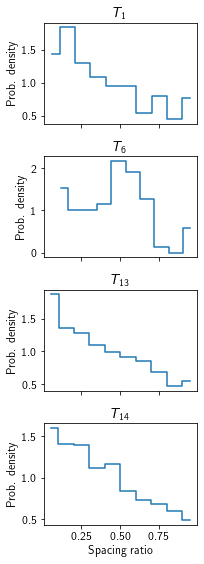

In [44]:
fig, axs = plt.subplots(len(Rs), 1, figsize=(3,8), sharex=True)
for Ri, vals in enumerate(vals_list):
    vals = vals - np.min(vals)
    #coeffs = np.polyfit(vals, np.arange(len(vals)), 5)
    #vals = np.poly1d(coeffs)(vals)
    gs = vals[1:] - vals[:-1]
    gs = gs[gs>1e-12]
    #gs = gs[gs<30]
    gs = np.array([[gs[i], gs[i-1]] for i in range(1,len(gs))]).T
    gs = np.min(gs, axis=0) / np.max(gs, axis=0)

    
    n, bins = np.histogram(gs, bins=10, density=True)
    x = bins[:-1] + np.diff(bins)/2
    xs = np.linspace(x[0], x[-1], 100)
    #func, popt, pcov = brody_fit(x[n>0], n[n>0], eta0=0.0)
    axs[Ri].step(x, n, where="mid")
    axs[Ri].set_title("$T_{%s}$"%Rs[Ri])
    axs[3].set_xlabel("Spacing ratio")
    axs[Ri].set_ylabel("Prob. density")
    print(Rs[Ri], np.mean(gs), gs.size)
    #axs[Ri,2].plot(xs, func(xs))
    #axs[Ri,2].set_yscale('log')
plt.tight_layout()

In [6]:
# Parameters template
params_template = dict(
              T=100.0,
              dt=0.1,
              R=6,
              r=1,
              BC="1-00",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              trotter=True)

phis =  np.linspace(0,180,25)
Ls=[5,7,9,11,13,15,17,19]
Qs = np.zeros((len(Ls), len(phis)), dtype="object")
for Li, L in enumerate(Ls):
    for phi, ph in enumerate(phis):
        params = copy(params_template) 
        params["V"] = f"HP_{ph}"
        params["hamiltonian"] = False
        params["dt"] = 1.0
        params["symmetric"] = False
        params["L"] = L

        QU = QCA(params, der=der)
    
        #QU.run(tasks=["rhoj", "rhojk"], verbose=False)
        Qs[Li, phi] = QU

KeyError: "Unable to open object (object 'rhoj' doesn't exist)"

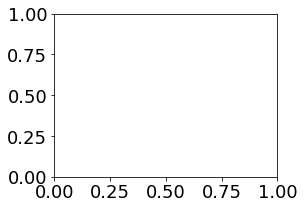

In [7]:
fig, axs = plt.subplots(1,1, figsize=(4,3))
for t in [1, 2, 3, 4]:
    Li = list(Ls).index(L)
    Cs = []
    for phi, ph in enumerate(phis):
        Q = Qs[-1, phi]
        Cs.append(Q.C(1)[t])
    axs.plot(phis*np.pi/180, Cs, marker="o", label=f"$t={t}$",mec=f"C{t-1}",mfc="none")
    axs.set_xlabel(r"Phase gate angle $\upsilon$ (rad.)")
    axs.set_ylabel(r"$\mathcal{C}(t)$")
    axs.set_xticks([0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
    axs.set_xticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3 \pi / 4$", "$\pi$"])
    
plt.legend()
plt.tight_layout()
#plt.savefig("figures/phase_gate_scan.pdf")

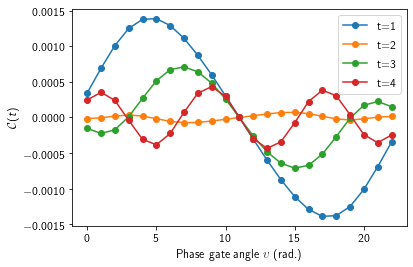

In [158]:
from figures import firstdiff
fig, axs = plt.subplots(1,1)
for t in [1, 2, 3, 4]:
    Li = list(Ls).index(L)
    Cs = []
    for phi, ph in enumerate(phis):
        Q = Qs[-1, phi]
        Cs.append(Q.C(1)[t])
    Cs = np.array(Cs)
    axs.plot(firstdiff(Cs,acc=2,dx=phis[1]-phis[0]), marker="o", label=f"t={t}")
    axs.set_xlabel(r"Phase gate angle $\upsilon$ (rad.)")
    axs.set_ylabel(r"$d\mathcal{C}(t)/dt$")
    
plt.legend()

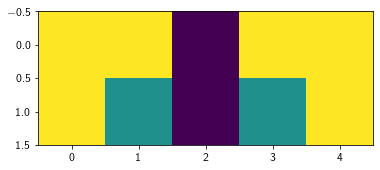

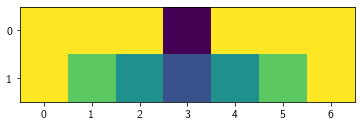

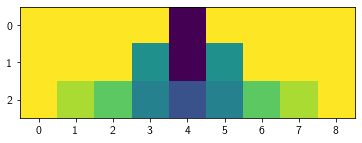

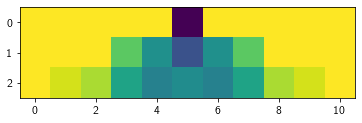

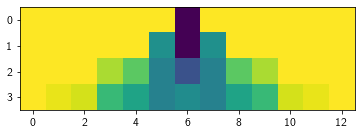

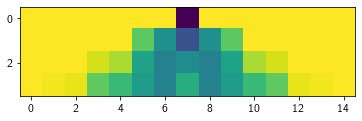

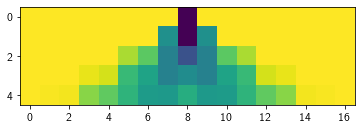

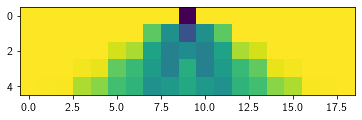

In [367]:
for Li, L in enumerate(Ls):
    lc = (L-1)//2
    ti=int(((lc - (lc)%2 )/ 2))
    plt.imshow(Qs[Li,12].exp("Z")[:ti+1])
    plt.show()

In [14]:
import qca
import core1d
from importlib import reload
reload(qca)
reload(core1d)
from qca import QCA

# Parameters template
params_template = dict(
              T=100.0,
              dt=0.1,
              R=6,
              r=1,
              BC="1-00",
              IC="c1_f0",
              E=0.0,
              N=1,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)


L=20

paramsU = copy(params_template) 
paramsU["V"] = "H"
paramsU["hamiltonian"] = False
paramsU["dt"] = 1.0
paramsU["symmetric"] = False
paramsU["L"] = L
paramsU["IC"] = "f0-1-2-3-4-5-6-7-8-9"

Q1 = QCA(paramsU, der=der)
Q1.run(tasks=["rhoj", "rhojk"])




Rank: 0
Updated: 4afe1008fdf4ee5388cb4eb90b2ec1f2bf9625ae
with ['rhoj', 'rhojk']
Parameters: {'L': 20, 'Lx': 1, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'H', 'IC': 'f0-1-2-3-4-5-6-7-8-9', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[0], [0]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': False, 'totalistic': False, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 20, 'rank': 0, 'nprocs': 1}
total file size: 5.05 MB
took: 657.23 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/4afe1008fdf4ee5388cb4eb90b2ec1f2bf9625ae.hdf5



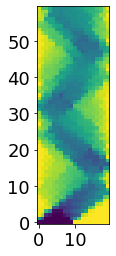

In [19]:
plt.imshow(Q1.exp("Z")[:60], origin="lower")

## ZZ symmetry in $T_6$ and $F_4$

In [7]:
import scipy
from states import bvecs
from matrix import listkron
from core1d import rule_hamiltonian
from matrix import ops
L=6
H6 = rule_hamiltonian(V="H", R=6, L=L, r=1, BC="0")
H4 = rule_hamiltonian(V="X", R=4, L=L, r=2, BC="0", totalistic=True)
O = 0
for i in range(L):
    o = ["I"]*L
    o[i] = "Z"
    o[(i+1)%L]="Z"
    O += listkron(ops[k] for k in o)

    
#H = listkron([0*ops["I"], H, 0*ops["I"]])
    
com6 = O.dot(H6)-H6.dot(O)
com4 = O.dot(H4)-H4.dot(O)
print(com6[np.abs(com4)>0].size)
print(com4[np.abs(com6)>0].size)
s = make_state(L,"R")
#s = listkron([bvecs["0"], s, bvecs["0"]])
print(np.real(np.dot(np.conj(s),O.dot(s))))
U = scipy.linalg.expm(-1j*H6*1)
s = U.dot(s)
print(np.real(np.dot(np.conj(s), O.dot(s))))

16
0
-0.2800444007608541
-0.2800444007608539


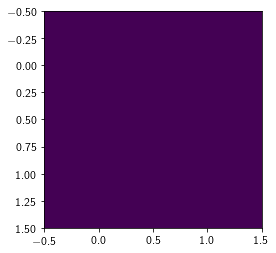

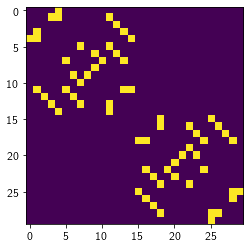

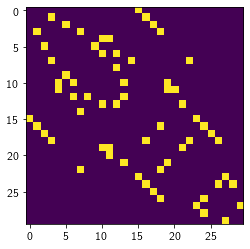

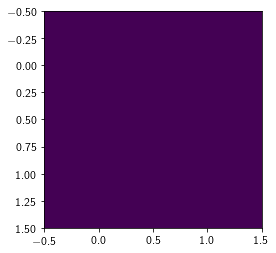

-6.0 [0, 2]
-2.0 [2, 32]
2.0 [32, 62]
6.0 [62, 64]


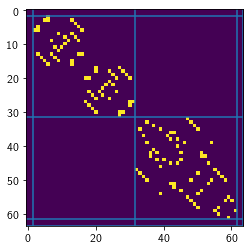

In [75]:
valsH, vecsH = eigh(H)
valsO, vecsO = eigh(O)

vals_dict = {v:0 for v in np.sort(list(set(valsO)))}
for k in valsO:
    vals_dict[k] += 1

HB = (vecsO.T).dot(H).dot(vecsO)
plt.imshow(np.abs(HB))
m = 0 
blocks = []
for v in np.sort(list(set(valsO))):
    dm = vals_dict[v]
    m += dm
    B = HB[m-dm:m, m-dm:m]
    blocks.append(B)
    plt.imshow(np.abs(B))
    plt.show()
    
m = 0 
plt.imshow(np.abs(HB))
for v in np.sort(list(set(valsO))):
    dm = vals_dict[v]
    m += dm
    print(v, [m-dm, m])
    plt.axhline(m-0.5)
    plt.axvline(m-0.5)
plt.show()

In [ ]:
from figures import brody_fit
for B in blocks:
    vals, vecs = eigh(B)
    if np.all(vals!=0):
        coeffs = np.polyfit(vals, np.arange(len(vals)), 5)
        vals = np.poly1d(coeffs)(vals)
        gs = vals[1:] - vals[:-1]
        gs = gs[gs>1e-12]
        #plt.plot(vals)
        #plt.show()
        
        gs = gs[gs<15]
        #gs = np.array([[gs[i], gs[i-1]] for i in range(1,len(gs))]).T
        #gs = np.min(gs, axis=0) / np.max(gs, axis=0)

    
        n, bins = np.histogram(gs, bins=20, density=True)
        x = bins[:-1] + np.diff(bins)/2
        xs = np.linspace(x[0], x[-1], 100)
        func, popt, pcov = brody_fit(x[n>0], n[n>0], eta0=1.0)
        #plt.plot(gs)
        plt.step(x, n, where="mid")
        #print(np.mean(gs), gs.size)
        plt.plot(xs, func(xs))
        #plt.yscale('log')

## Translation operator

In [16]:
from matrix import listkron, op_at, ops
from states import bvecs
from core1d import rule_hamiltonian
from numpy.linalg import eigh

In [17]:
def CNOT(i,j,L):
    return op_at(["0","I"], [i, j], L) + op_at(["1","X"], [i, j], L)


def SWAP(i,j,L):
    return CNOT(i, j, L).dot(CNOT(j, i, L)).dot(CNOT(i, j, L))


In [18]:
L=8

H = rule_hamiltonian(V="X", R=6, L=L, r=1, BC="0")

T = np.eye(2**L)
for j in range(1, L):
    T = T.dot(SWAP(0,j, L))
    
T = T.dot(T)
    
com = T.dot(H)-H.dot(T) 
print(com[np.abs(com)>1e-6].size)

0


In [19]:
ops["m"]=np.outer(bvecs["0"], bvecs["1"])
ops["p"]=np.outer(bvecs["1"], bvecs["0"])

In [20]:
L=6
OO = np.eye(2**L)
for j in range(L):
    O = 0
    o = ["I"]*L
    o[j] = "p"
    o[(j+1)%L] = "m"
    O += listkron([ops[oi] for oi in o])
    
    o = ["I"]*L
    o[j] = "m"
    o[(j+1)%L] = "p"
    O += listkron([ops[oi] for oi in o])
    
    o = ["I"]*L
    o[j] = "Z"
    o[(j+1)%L] = "Z"
    O += 2*listkron([ops[oi] for oi in o]) 
    
    o = ["I"]*L
    o[j] = "I"
    o[(j+1)%L] = "I"
    O += 2*listkron([ops[oi] for oi in o]) 
    
    O /= 4

    OO = OO.dot(O)
    


O2 = OO.dot(OO)
    


In [21]:
from matrix import dec_to_bin, listkron
L=6
H = rule_hamiltonian(V="X", R=6, L=L, r=1, BC="0")
com = O2.dot(H) - H.dot(O2)
com[np.abs(com)>0].size

268

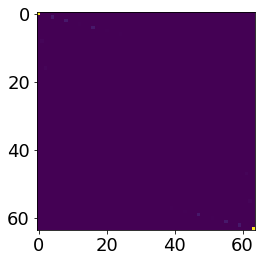

In [22]:
plt.imshow(np.abs(O2))

In [29]:
from matrix import dec_to_bin
L=6
H = rule_hamiltonian(V="X", R=6, L=L, r=1, BC="0")
TT = 0
for i in range(2**L):
    S = dec_to_bin(i, L)
    Sr = np.roll(S, 3)
    TT += np.outer(listkron([bvecs[str(s)] for s in S]),
                   listkron([bvecs[str(s)] for s in Sr]))

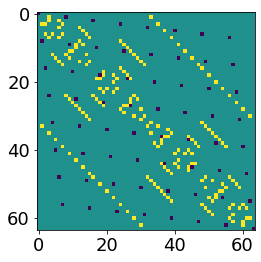

In [30]:
plt.imshow(np.abs(H)-np.abs(TT))

In [31]:
com = H.dot(TT) - TT.dot(H)
com[np.abs(com)>0].size

0

In [70]:
from matrix import rdm
from scipy.linalg import expm

## ETH

In [ ]:
from measures import get_expectation, get_rhoj
from scipy.linalg import expm
betas = np.geomspace(0.1, 50, 20)
Ls = [6, 8, 10, 12]
Rs = [1 ,6, 13, 14]
BCs = ["0", "1-00"]
Cs = np.zeros((len(BCs),len(Rs), len(Ls), len(betas)))
Zs = []



for Li, L in enumerate(Ls):
    ZsL = np.zeros((len(BCs),len(Rs), len(betas), L))
    for BCi, BC in enumerate(BCs):
        for Ri, R in enumerate(Rs):
            H = rule_hamiltonian(V="X", R=R, L=L, r=1, BC=BC)
            for betai, beta in enumerate(betas):
                ebH = expm(-beta*H)
                part = np.trace(ebH)
                thstate = ebH / part
                ZsL[BCi, Ri, betai, :] = get_expectation(get_rhoj(thstate), ops["Z"])
                Cs[BCi, Ri, Li, betai] = measures.network_clustering(
                                            measures.get_MI_from_state(
                                                thstate, order=1))
            
    
            plt.imshow(np.abs(thstate))
            plt.title(f"L={L}, BC={BC}, R = {R}, beta={np.round(beta,3)}")
            #plt.show()
    Zs.append(ZsL)

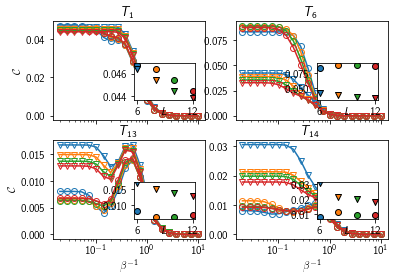

In [250]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
for Ri, R in enumerate(Rs):    
    ax = axs[int(Ri // 2), Ri %2]
    axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(.5, .5, .8, .5),
                   bbox_transform=ax.transAxes, loc=3)
    for BCi, (m, BC) in enumerate(zip(["o", "v"], BCs)):
        for Li, L in enumerate(Ls):
            c = f"C{Li}"
            ax.semilogx(1/betas[:], Cs[BCi, Ri, Li][:], 
                      color=c, mec=c, mfc="none", marker=m)
            axins.scatter([L],[Cs[BCi, Ri, Li, -1]], ec="k", color=c, marker=m)
            
            
    axins.set_xticks([6,12])
    axins.set_xlabel("$L$", labelpad=-10)
    #axins.set_xscale("log")
    #axins.set_yscale("log")
    ax.set_title("$T_{%s}$"%R)


axs[1,0].set_xlabel(r"$\beta^{-1}$")
axs[1,1].set_xlabel(r"$\beta^{-1}$")
axs[0, 0].set_ylabel(r"$\mathcal{C}$")
axs[1, 0].set_ylabel(r"$\mathcal{C}$")
plt.show()

In [155]:
betas[4]

0.41854326680244175

IndexError: list index out of range

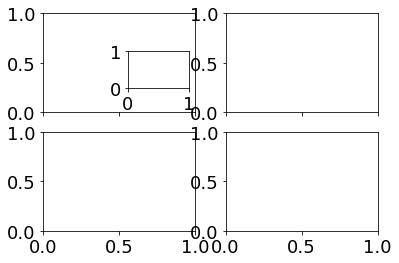

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
for Ri, R in enumerate(Rs):    
    ax = axs[int(Ri // 2), Ri %2]
    axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(.5, .15, .8, .5),
                   bbox_transform=ax.transAxes, loc=3)
    for BCi, (m, BC) in enumerate(zip(["o", "v"], BCs)):
        for Li, L in enumerate(Ls):
            c = f"C{Li}"
            ax.plot(1/betas[:], np.abs(np.mean(Zs[Li][BCi, Ri, :, :], axis=1)), 
                      color=c, mec=c, mfc="none", marker=m)
            
            axins.scatter([L],[np.mean(Zs[Li][BCi, Ri, -1], axis=0)], ec="k", color=c, marker=m)
            
    axins.set_xticks([6,12])
    axins.set_xlabel("$L$", labelpad=-10)
    ax.set_title("$T_{%s}$"%R)
    ax.set_xscale("log")
    #ax.set_yscale("log")
axs[1,0].set_xlabel(r"$\beta^{-1}$")
axs[1,1].set_xlabel(r"$\beta^{-1}$")
axs[0, 0].set_ylabel("Mean magnetization")
axs[1, 0].set_ylabel(r"Mean magnetization")
plt.show()

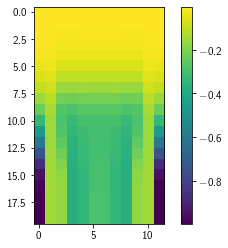

In [258]:
plt.imshow(Zs[-1][0, 3,:])
plt.colorbar()

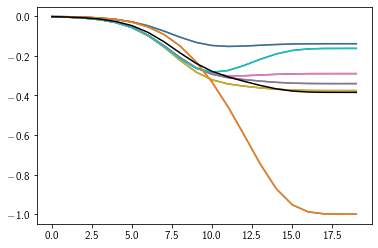

In [235]:
plt.plot(Zs[-1][0,3,:])
plt.plot(np.mean(Zs[-1][0,3,:], axis=1), c="k")
